# About LoanTap :

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

   * Personal Loan
   * EMI Free Loan
   * Personal Overdraft
   * Advance Salary Loan

# Problem Statement
 * The task is to determine if credit line is extendable to the applicants based on the given features.
 * If credit line is extended what should be the repayment terms.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

In [127]:
df = pd.read_csv('logistic_regression.csv')

In [128]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [129]:
df.shape

(396030, 27)

In [130]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [132]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [133]:
for i in df.columns:
  print()
  print(f'Unique values in {i} :',df[i].unique())
  print()
  print('='*90)


Unique values in loan_amnt : [10000.  8000. 15600. ... 36275. 36475.   725.]


Unique values in term : [' 36 months' ' 60 months']


Unique values in int_rate : [11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.97  6.99 15.61 11.36 13.35 12.12
  9.99  8.19 18.75  6.03 14.99 16.78 13.67 13.98 16.99 19.91 17.86 21.49
 12.99 18.54  7.89 17.1  18.25 11.67  6.24  8.18 12.35 14.16 17.56 18.55
 22.15 10.39 15.99 16.07 24.99  9.67 19.19 21.   12.69 10.74  6.68 19.22
 11.49 16.55 19.97 24.7  13.49 18.24 16.49 25.78 25.83 18.64  7.51 13.99
 15.22 15.31  7.69 19.53 10.16  7.62  9.75 13.68 15.88 14.65  6.92 23.83
 10.75 18.49 20.31 17.57 27.31 19.99 22.99 12.59 10.37 14.33 13.53 22.45
 24.5  17.99  9.16 12.49 11.55 17.76 28.99 23.1  20.49 22.7  10.15  6.89
 19.52  8.9  14.3   9.49 25.99 24.08 13.05 14.98 16.59 11.26 25.89 14.48
 21.99 23.99  5.99 14.47 11.53  8.67  8.59 10.64 23.28 25.44  9.71 16.2
 19.24 24.11 15.8  15.96 14.49 18.99

1. Some features have mismatch in their datatypes.
2. Some of the Features are categorical

In [134]:
df.drop_duplicates(inplace = True)

In [135]:
from dateutil import parser
def parse_date(date):
    try:
        return parser.parse(date)
    except:
        return pd.NaT

# Apply the function to the 'earliest_cr_line' column
df['earliest_cr_line'] = df['earliest_cr_line'].apply(parse_date)

In [136]:
df['issue_d'] = pd.to_datetime(df['issue_d'],format = '%b-%Y')

In [137]:
df["loan_status"].value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

* Target variable is imbalanced.

### Missing values

In [138]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [139]:
pip install --upgrade missingno

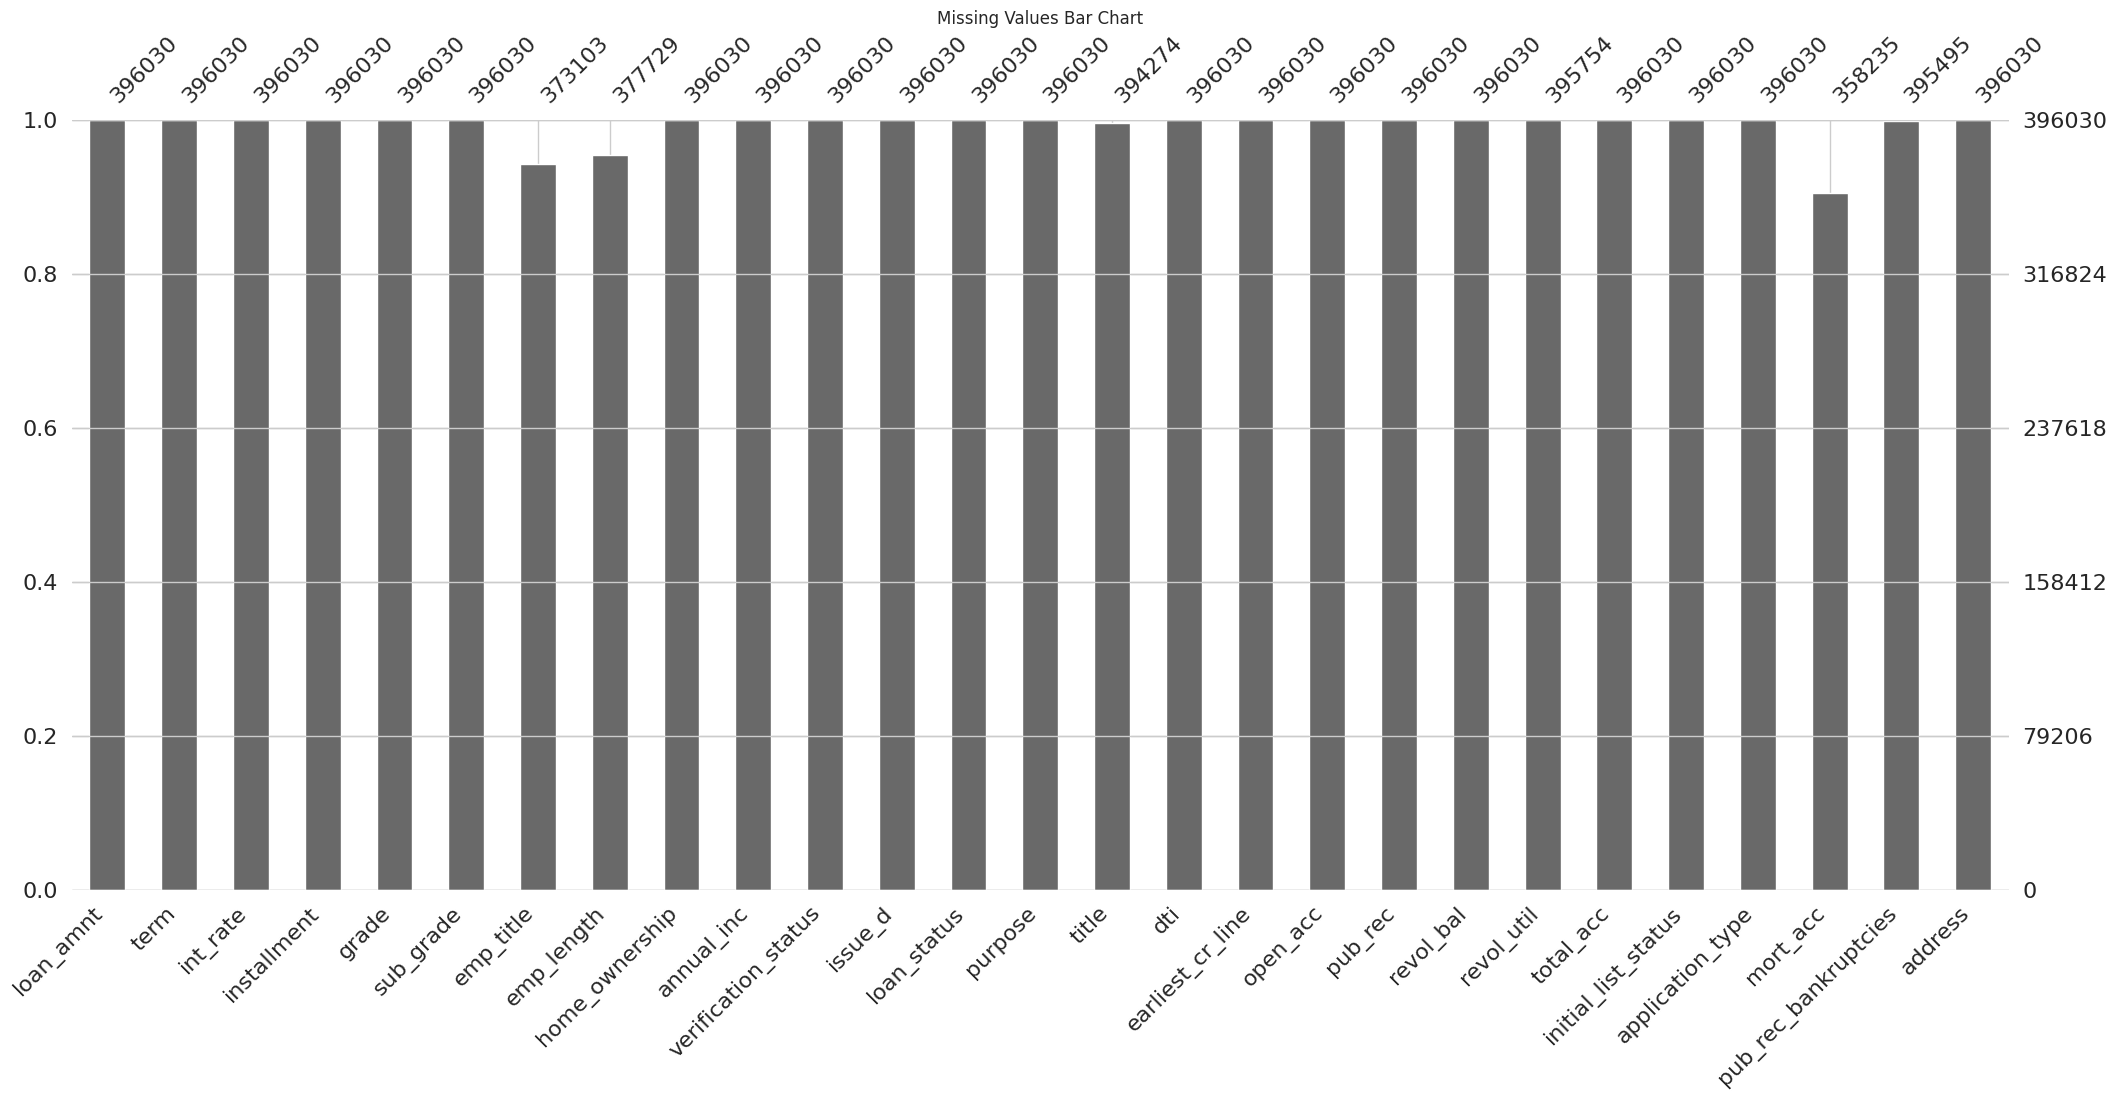

In [140]:
import missingno as msno
msno.bar(df)
plt.title('Missing Values Bar Chart')
plt.show()

* Following columns have missing values:
     * emp_title
     * emp_length
     * title
     * mort_acc
     * pub_rec_bankruptcies

## Univariate Analysis

In [143]:
grade_crosstab = pd.crosstab(df['grade'], df['loan_status'], normalize='index')
grade_crosstab

loan_status,Charged Off,Fully Paid
grade,,
A,0.062879,0.937121
B,0.125730,0.874270
C,0.211809,0.788191
D,0.288678,0.711322
E,0.373634,0.626366
F,0.427880,0.572120
G,0.478389,0.521611


In [144]:


# Analysis 2: Name the Top 2 Afforded Job Titles
# Filter the dataset for fully paid loans
fully_paid_loans = df[df['loan_status'] == 'Fully Paid']

# Count the occurrences of each job title
top_job_titles = fully_paid_loans['emp_title'].value_counts().head(2)

# Display the top 2 job titles
print("Top 2 afforded job titles:")
print(top_job_titles)

Top 2 afforded job titles:
emp_title
Teacher    3532
Manager    3321
Name: count, dtype: int64


### Numeric Columns

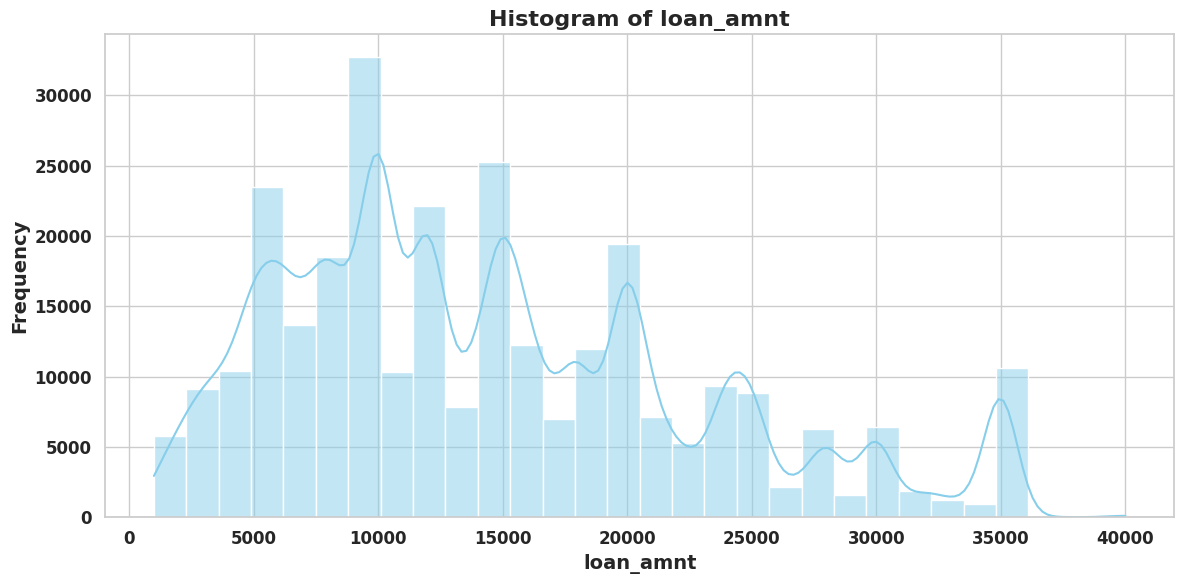

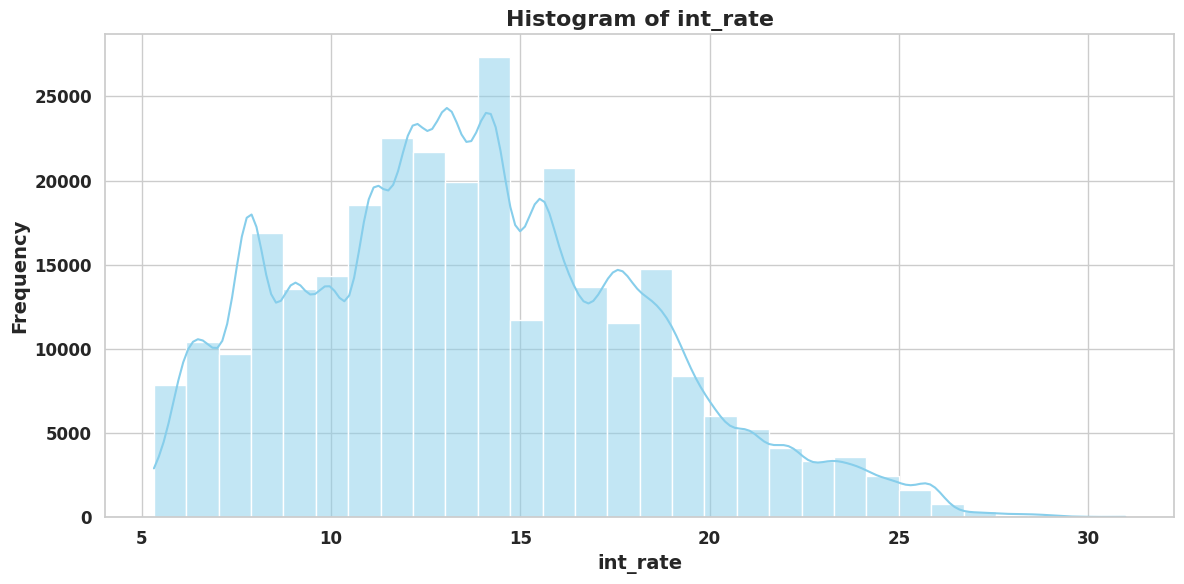

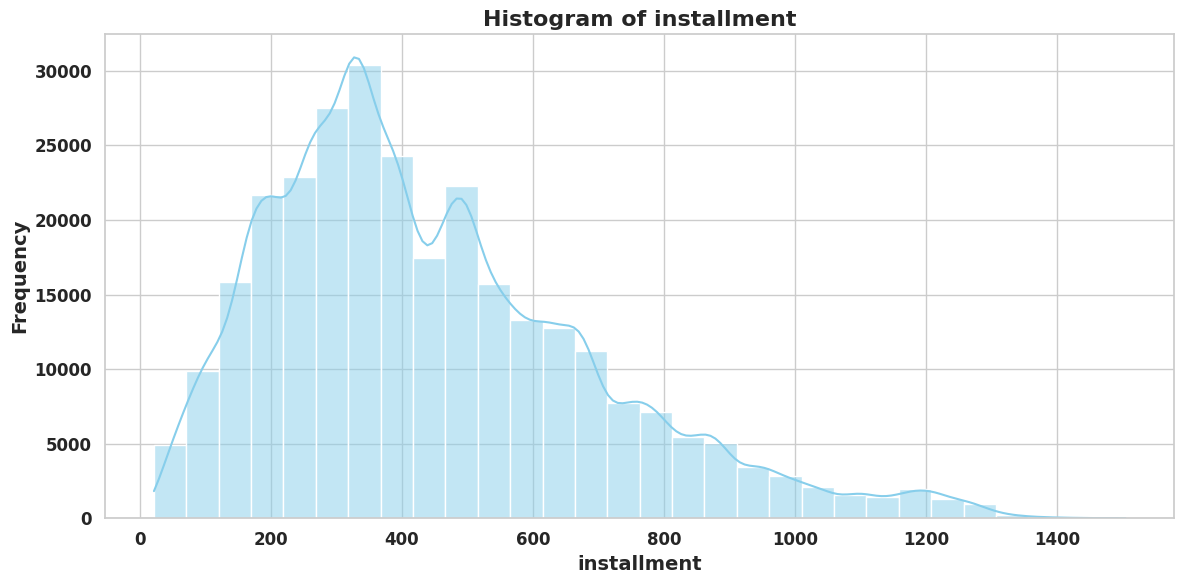

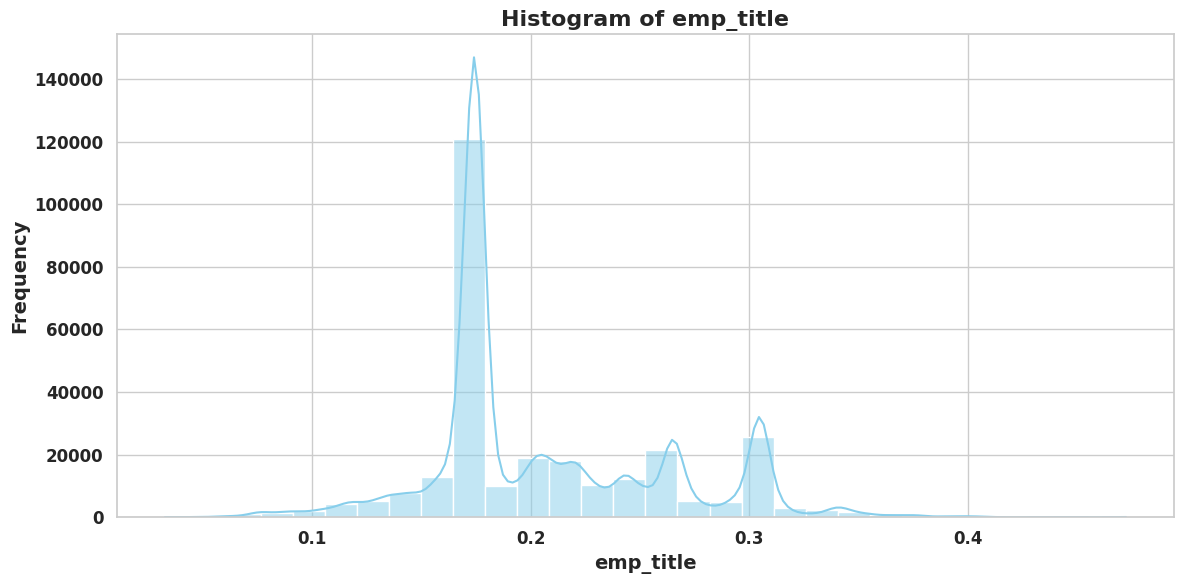

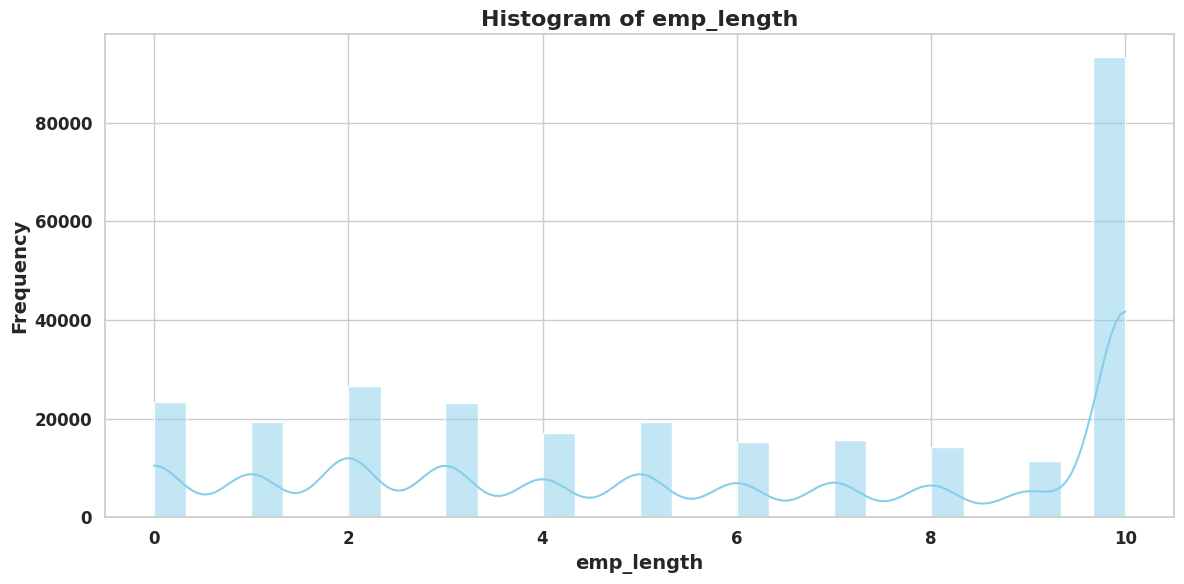

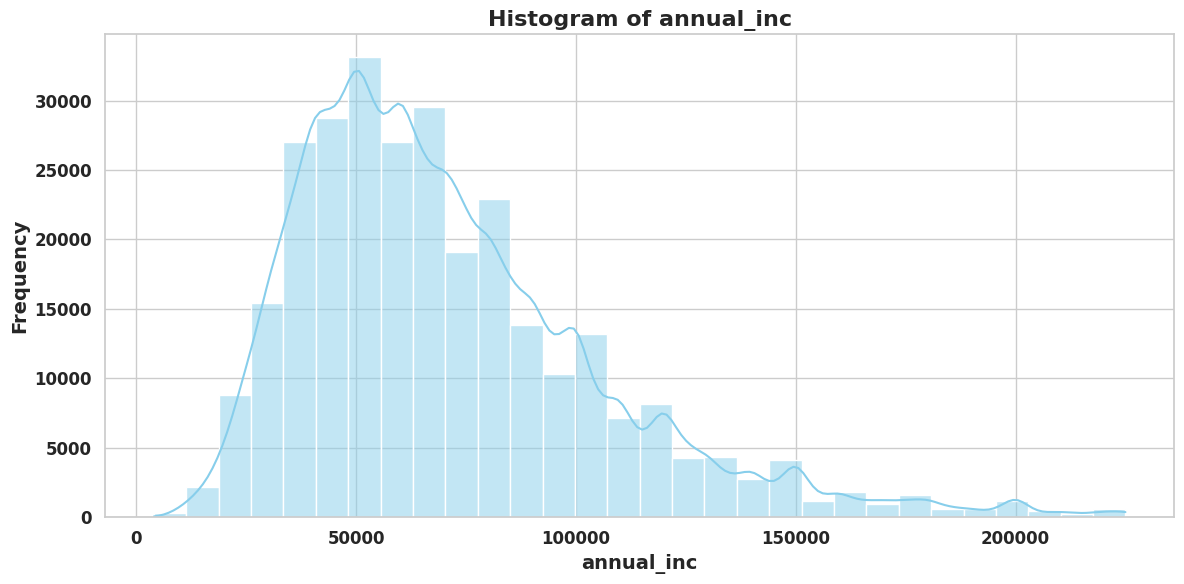

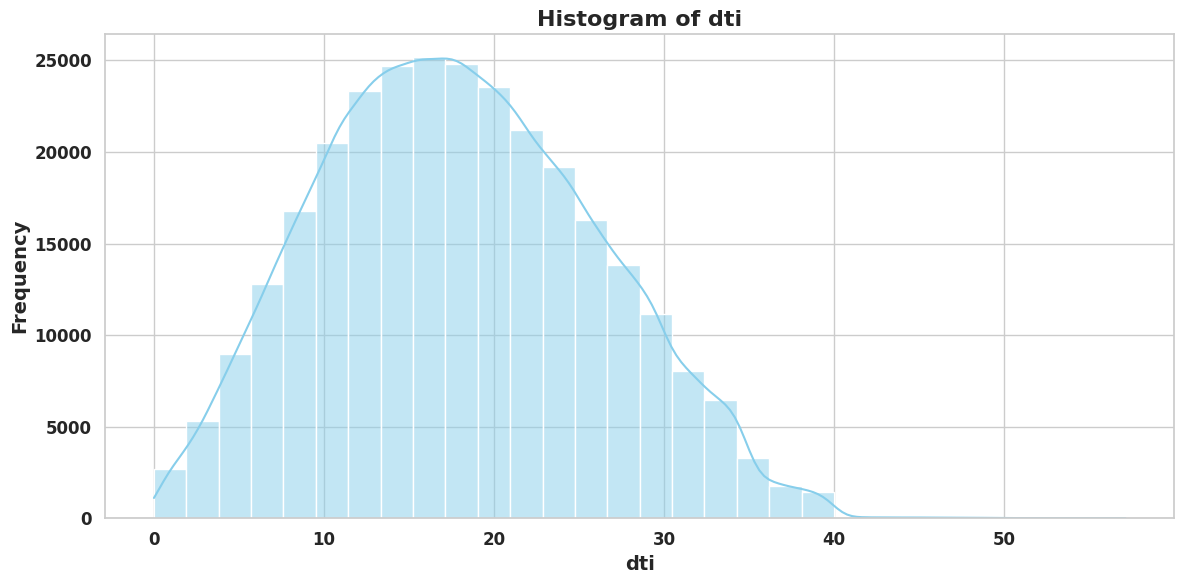

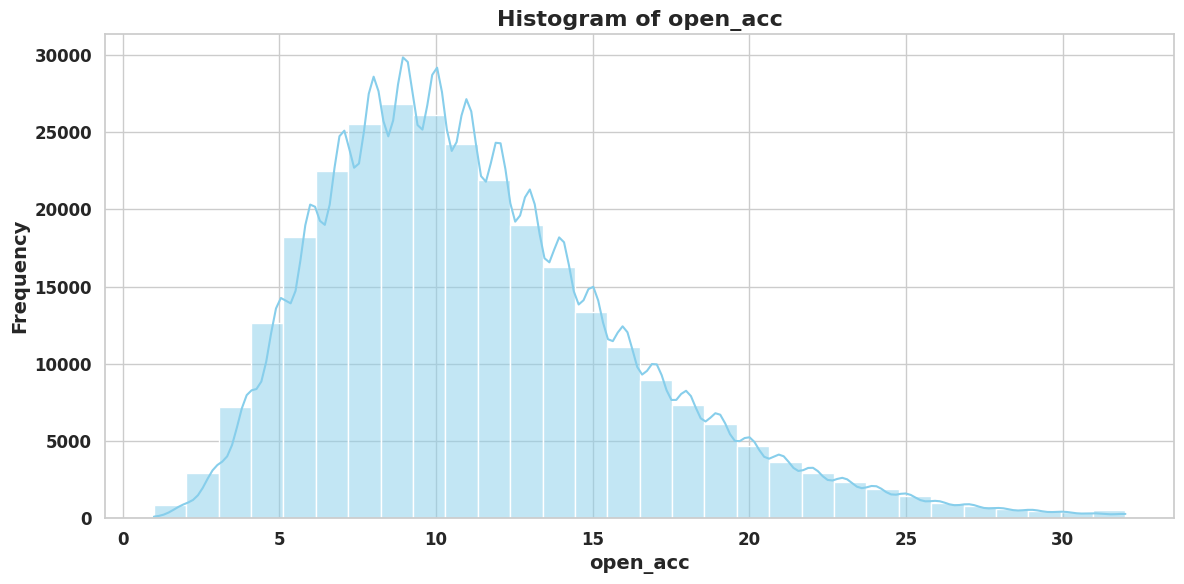

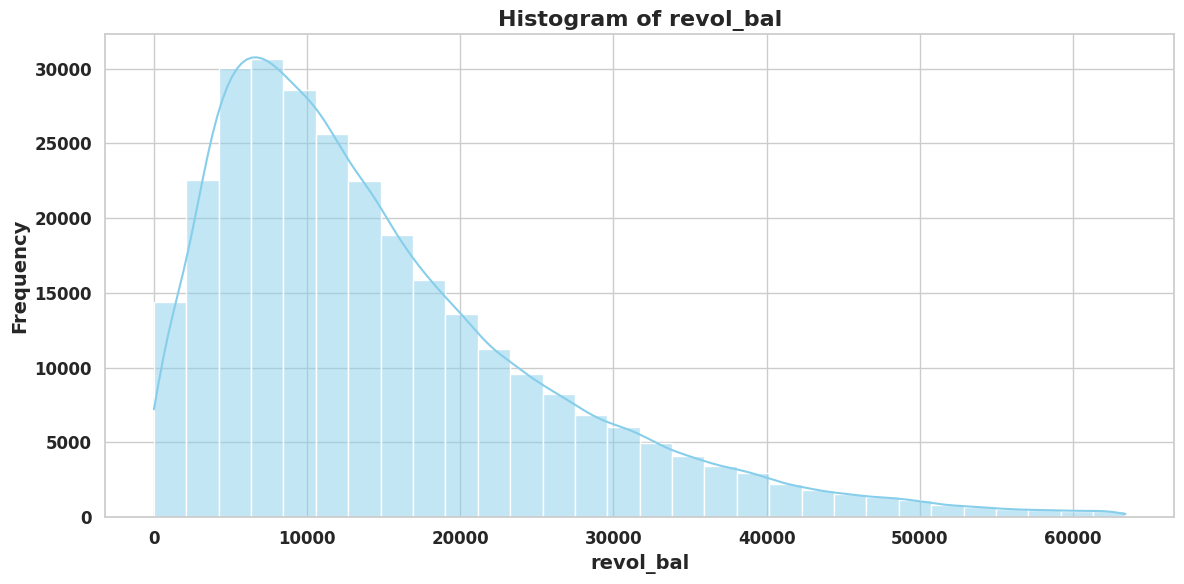

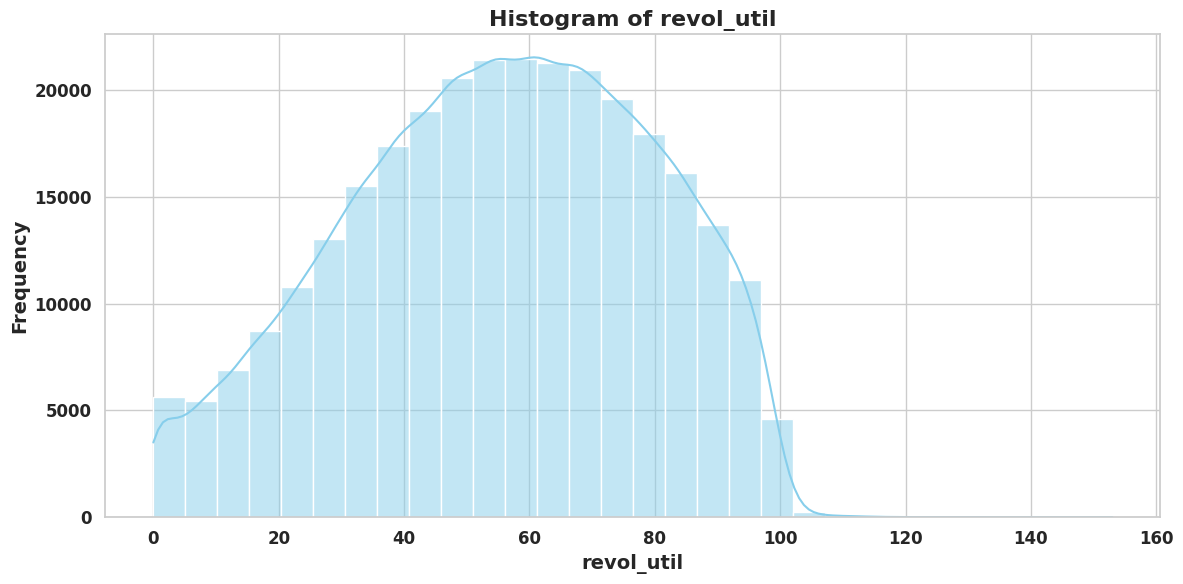

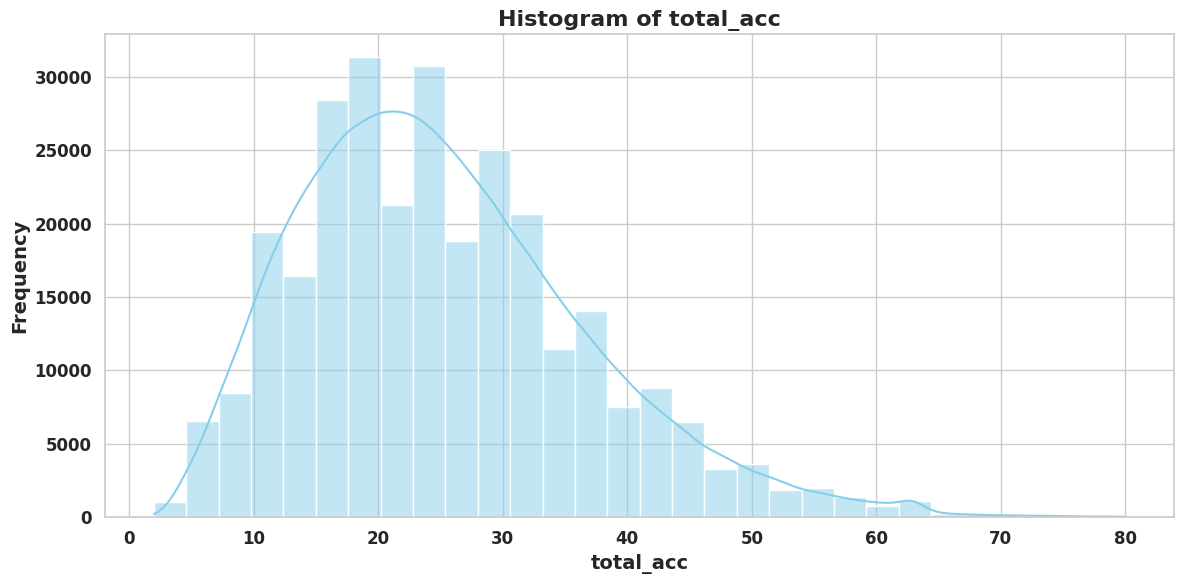

In [121]:
# Select float64 columns
float_cols = df.select_dtypes(include=['float64']).columns

# Set style and color palette
sns.set(style="whitegrid", palette="pastel")

# Loop through each column in float_cols and create a histogram
for col in float_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

1. The loan amount does not follow any particular distribution, although it is right-skewed.
2. The most preferred interest rate lies between 10% and 15%.
3. Most borrowers have opted to pay the loan in 200 to 400 installments.
4. Most borrowers have an employment length of 10+ years.
The annual income of most borrowers is between **50000** and **100,000**.
5. The debt-to-income (DTI) ratio of most borrowers lies between 10% and 20%.
6. Most borrowers have 5 to 15 open credit lines.

In [17]:
float_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

# Checking Outliers

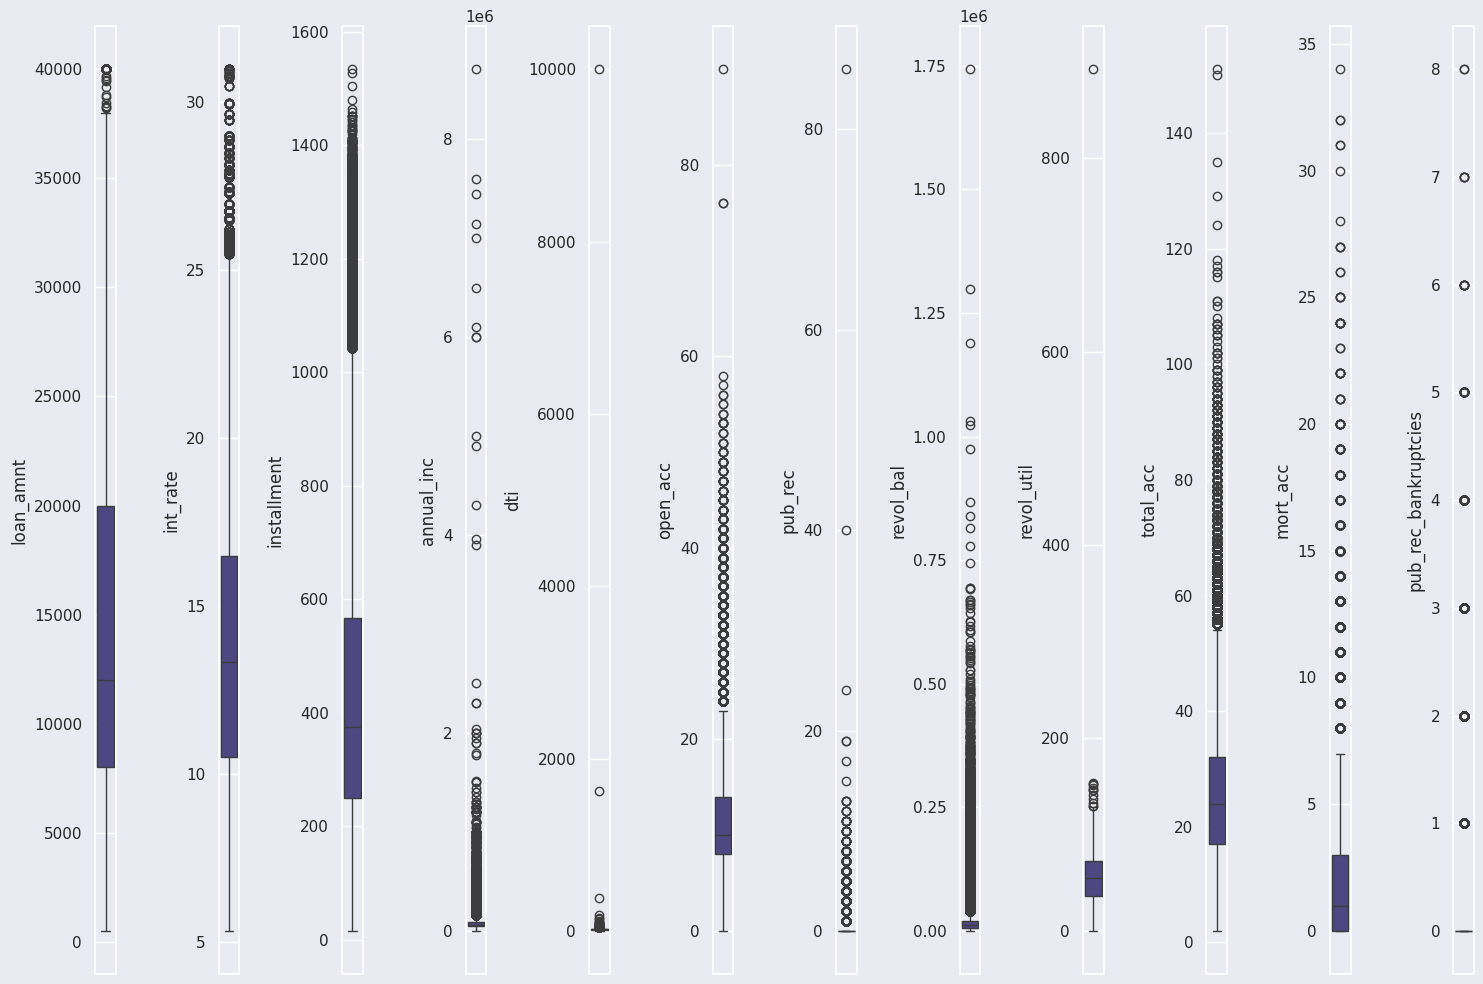

In [18]:


# Check for outliers using the IQR method
for col in float_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
sns.set(style="darkgrid", palette="dark", rc={"figure.facecolor": "#EAEAF2"})
plt.figure(figsize=(15, 10))
for i, col in enumerate(float_cols, 1):
    plt.subplot(1, len(float_cols), i)
    sns.boxplot(y=df[col], color='darkslateblue')

plt.tight_layout()
plt.show()


* Almost all numerical columns have outliers.

#### Removing the Outliers

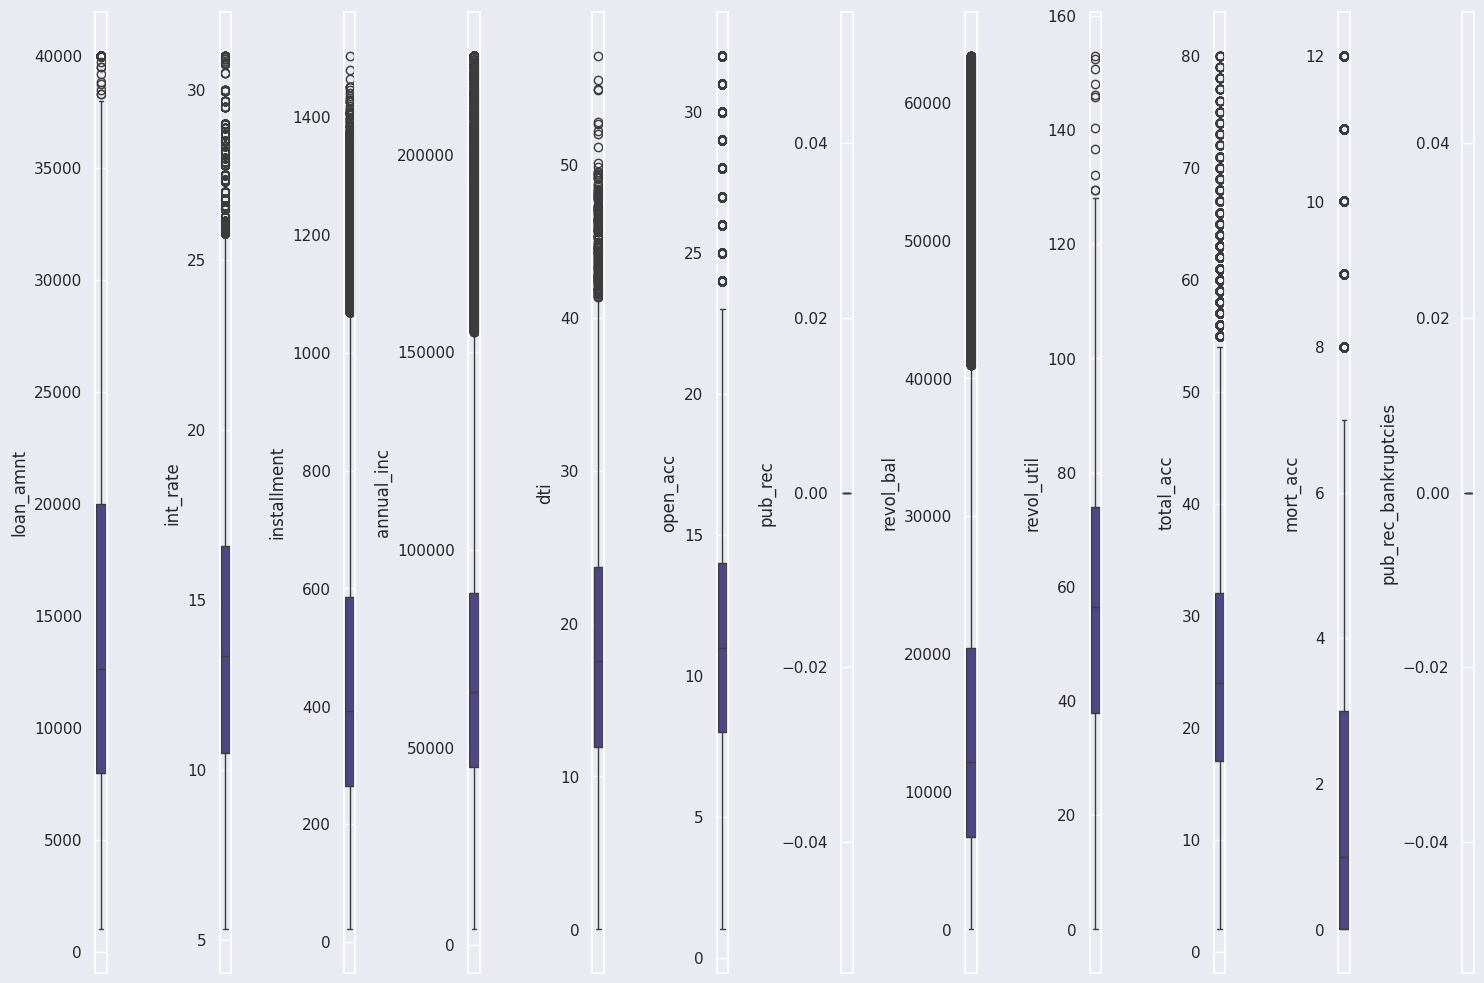

In [19]:
for col in float_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Filter out the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



# Visualize the results using box plots
sns.set(style="darkgrid", palette="dark", rc={"figure.facecolor": "#EAEAF2"})
plt.figure(figsize=(15, 10))

for i, col in enumerate(float_cols, 1):
    plt.subplot(1, len(float_cols), i)
    sns.boxplot(y=df[col], color='darkslateblue')

plt.tight_layout()
plt.show()

### Object and Categorical Columns

In [20]:
cat_vars = ['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']

In [21]:
# List of categorical variables
cat_vars = ['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']

# Define a list of color palettes for variety
color_palettes = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'cool', 'spring', 'summer', 'autumn', 'winter']


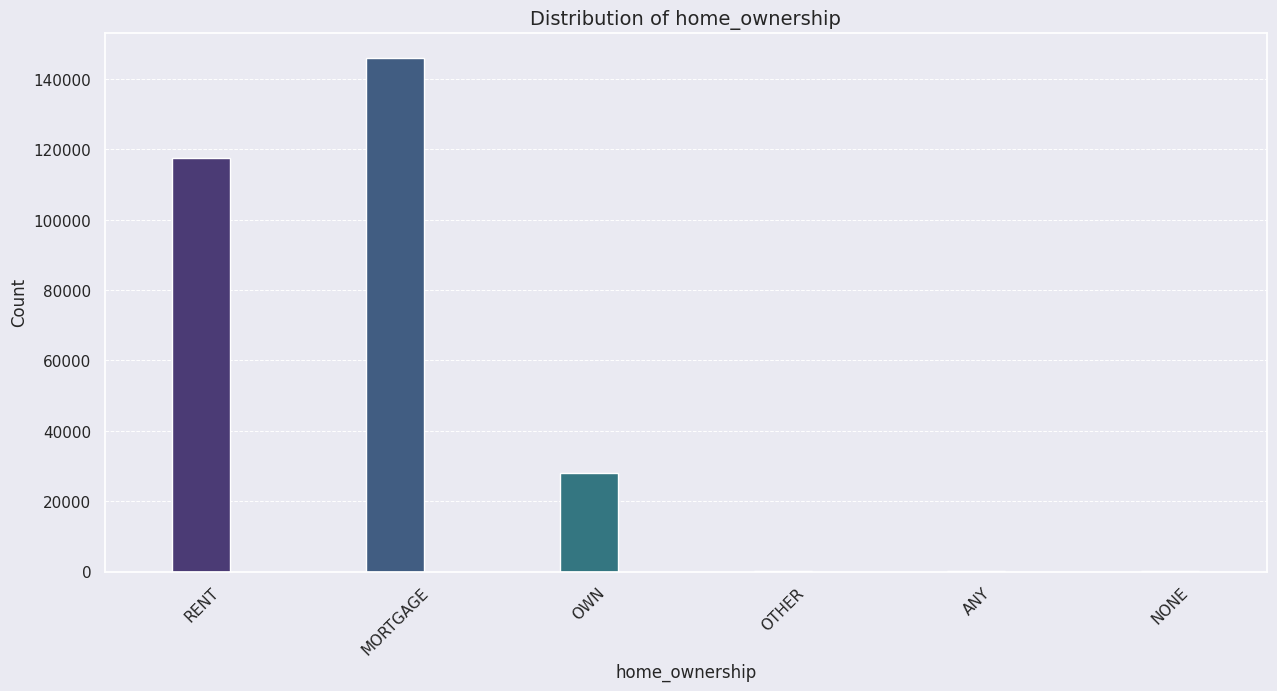

In [22]:
# Plot the distribution of 'home_ownership'
plt.figure(figsize=(15, 7))
plt.title('Distribution of home_ownership', fontsize=14)
sns.countplot(data=df, x='home_ownership', width = 0.3, palette=color_palettes[0])
plt.xticks(rotation=45)
plt.xlabel('home_ownership', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


* Most of the borrowers have provided Mortgage as home ownership status.
* Rent is the second most home ownership status.

In [23]:
df["home_ownership"].replace({"ANY":"OTHER",
                             "NONE":"OTHER"},
                            inplace=True)

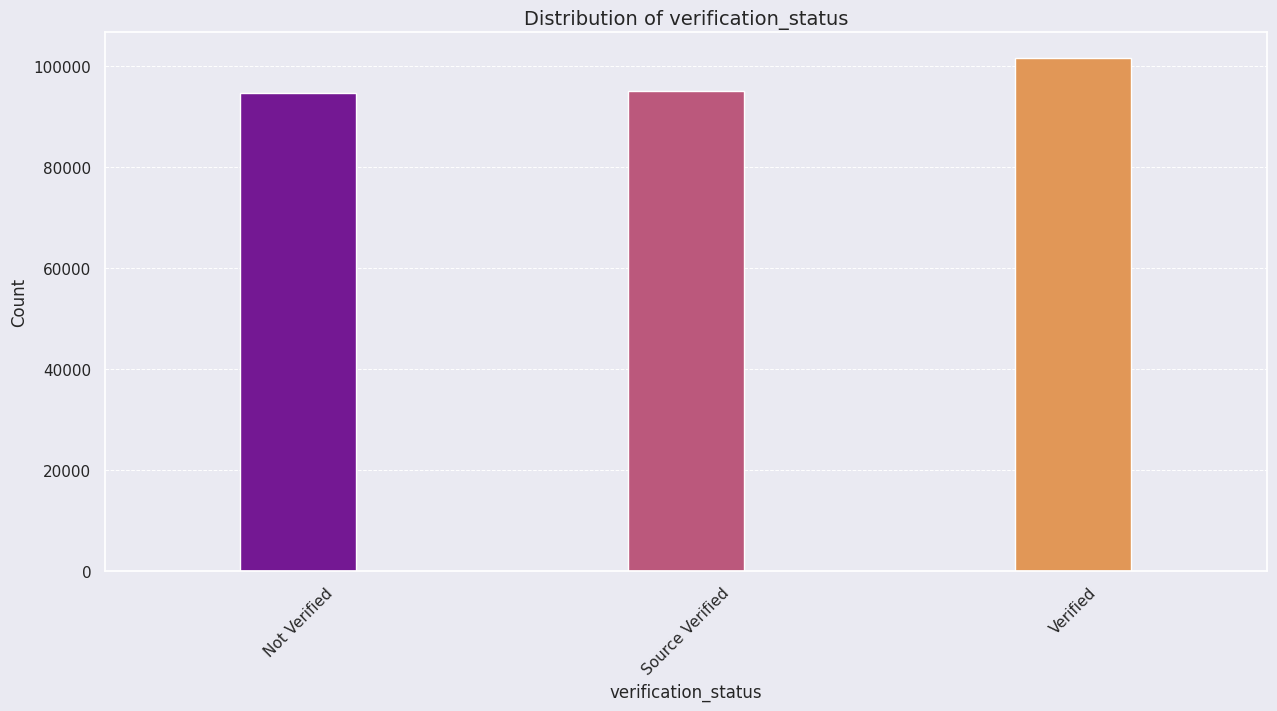

In [24]:
# Plot the distribution of 'verification_status'
plt.figure(figsize=(15, 7))
plt.title('Distribution of verification_status', fontsize=14)
sns.countplot(data=df, x='verification_status',width = 0.3, palette=color_palettes[1])
plt.xticks(rotation=45)
plt.xlabel('verification_status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


* The income of most of the borrowers has been verified by the Organisation.
* Although in majority cases it is still needed to be varified.

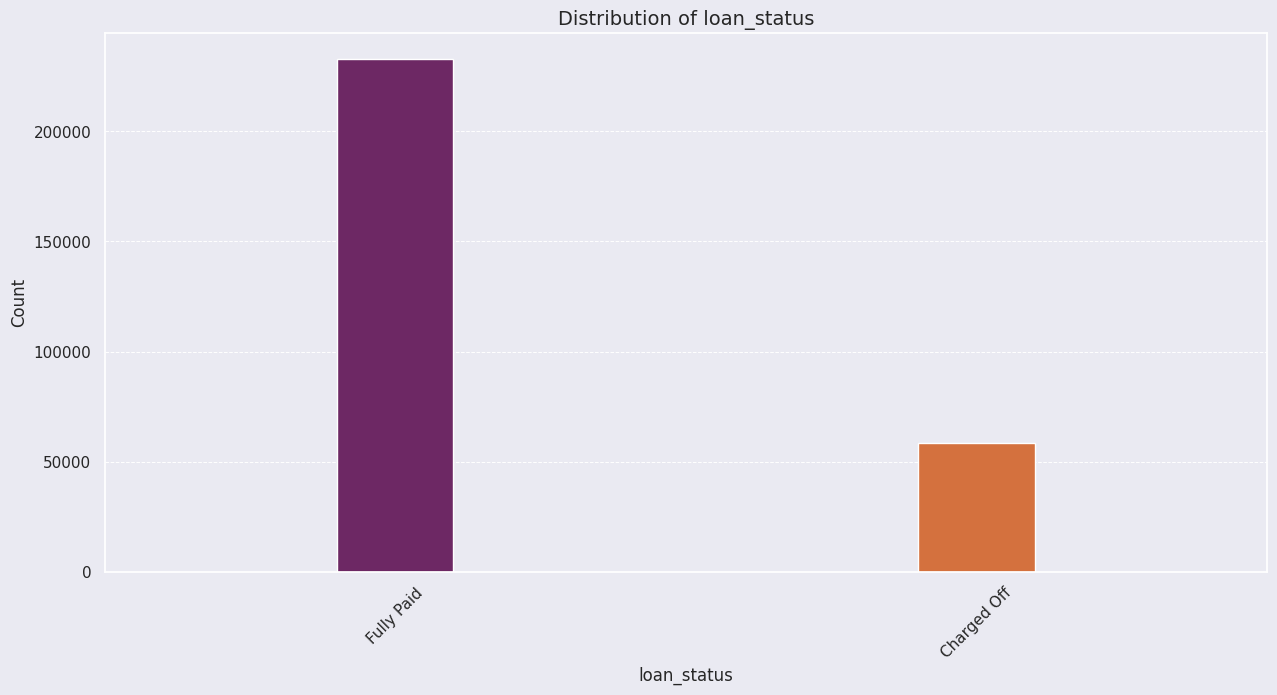

In [25]:
# Plot the distribution of 'loan_status'
plt.figure(figsize=(15, 7))
plt.title('Distribution of loan_status', fontsize=14)
sns.countplot(data=df, x='loan_status',width = 0.2, palette=color_palettes[2])
plt.xticks(rotation=45)
plt.xlabel('loan_status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


* It can be seen that there is **imbalance** in loan status(target variable)
* Fully paid is the status of most of the loans.

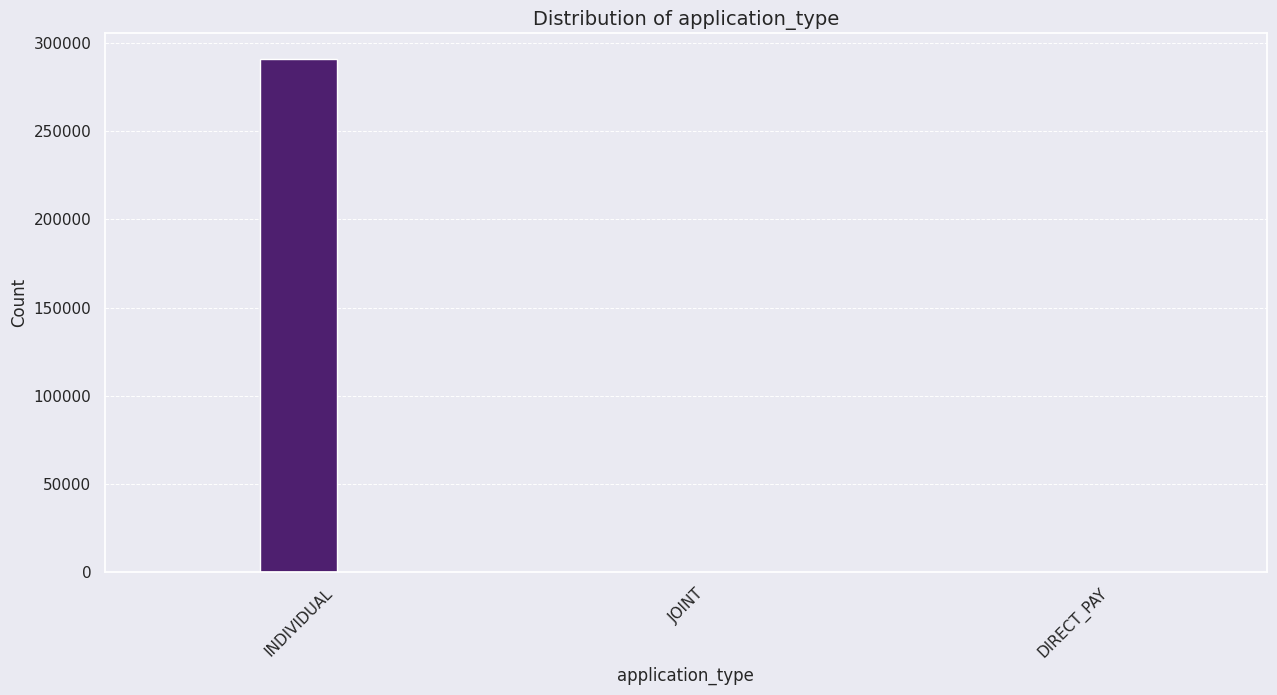

In [26]:
# Plot the distribution of 'application_type'
plt.figure(figsize=(15, 7))
plt.title('Distribution of application_type', fontsize=14)
sns.countplot(data=df, x='application_type',width = 0.2, palette=color_palettes[3])
plt.xticks(rotation=45)
plt.xlabel('application_type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


* Most of the filed applications are having Individual status.

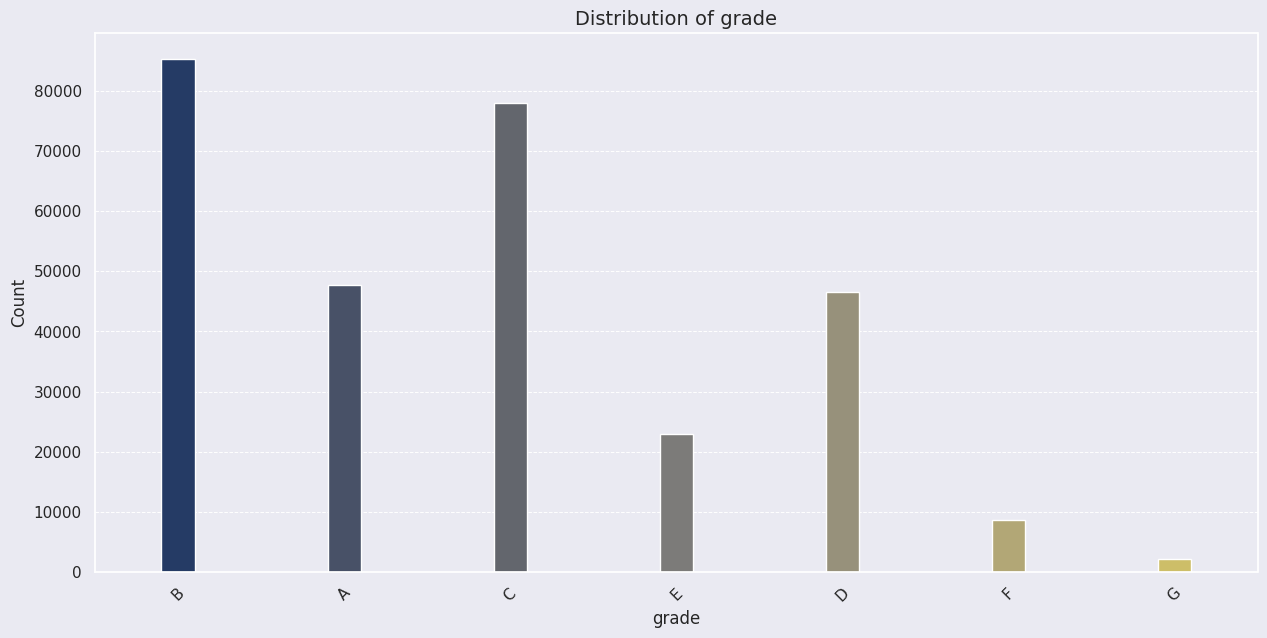

In [27]:
# Plot the distribution of 'grade'
plt.figure(figsize=(15, 7))
plt.title('Distribution of grade', fontsize=14)
sns.countplot(data=df, x='grade',width = 0.2, palette=color_palettes[4])
plt.xticks(rotation=45)
plt.xlabel('grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


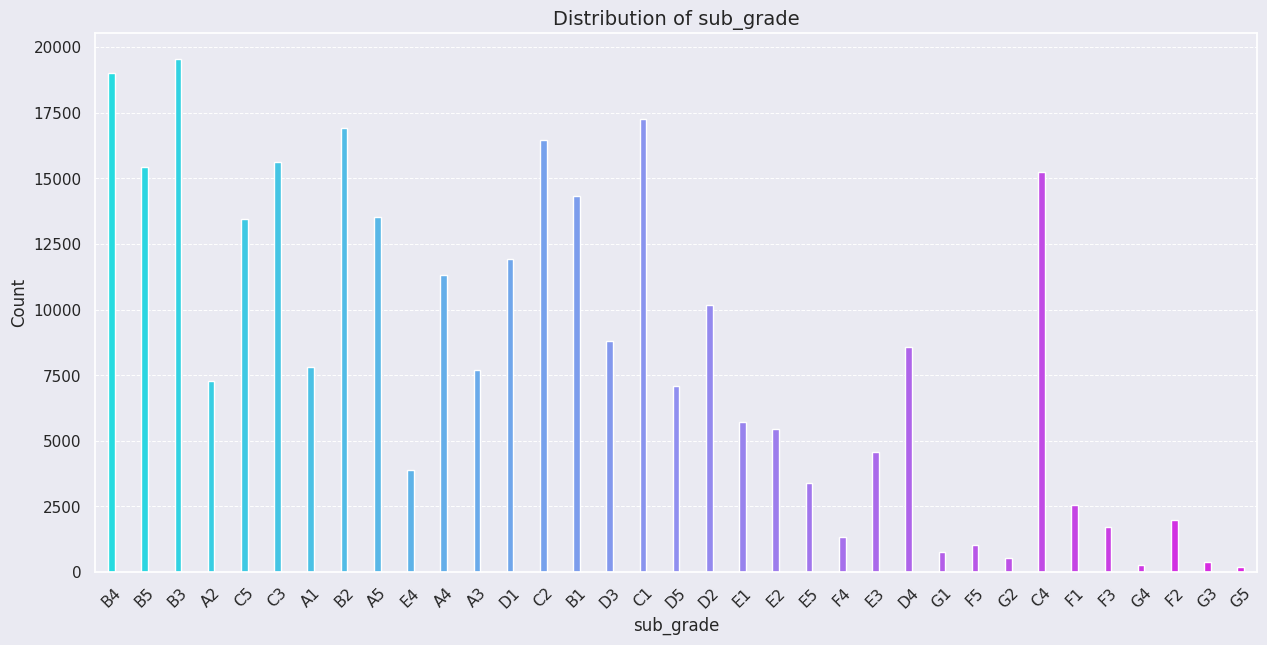

In [28]:
# Plot the distribution of 'sub_grade'
plt.figure(figsize=(15, 7))
plt.title('Distribution of sub_grade', fontsize=14)
sns.countplot(data=df, x='sub_grade',width = 0.2, palette=color_palettes[5])
plt.xticks(rotation=45)
plt.xlabel('sub_grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


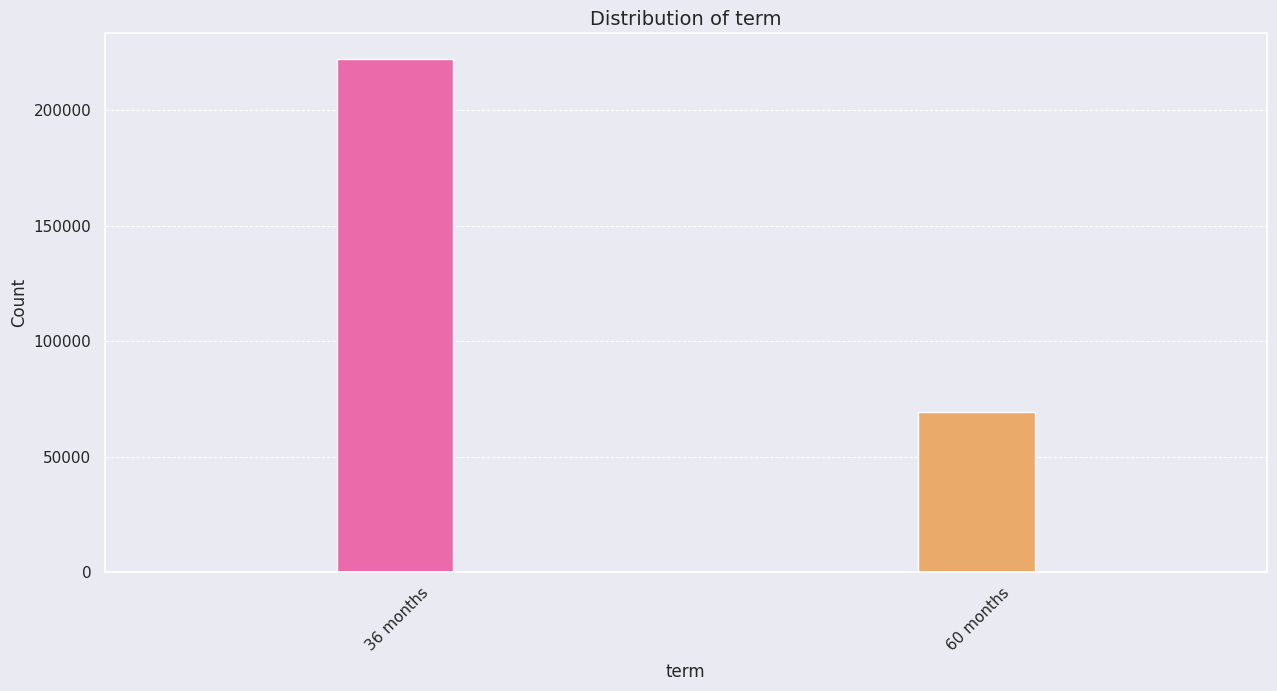

In [29]:
# Plot the distribution of 'term'
plt.figure(figsize=(15, 7))
plt.title('Distribution of term', fontsize=14)
sns.countplot(data=df, x='term', width = 0.2, palette=color_palettes[6])
plt.xticks(rotation=45)
plt.xlabel('term', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


* Majority of loans have been distributed in the period of 36 months for repayment while some loans have been distributed for 60 months period

# Bivariate Analysis

### Numerical Columns

In [30]:
float_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

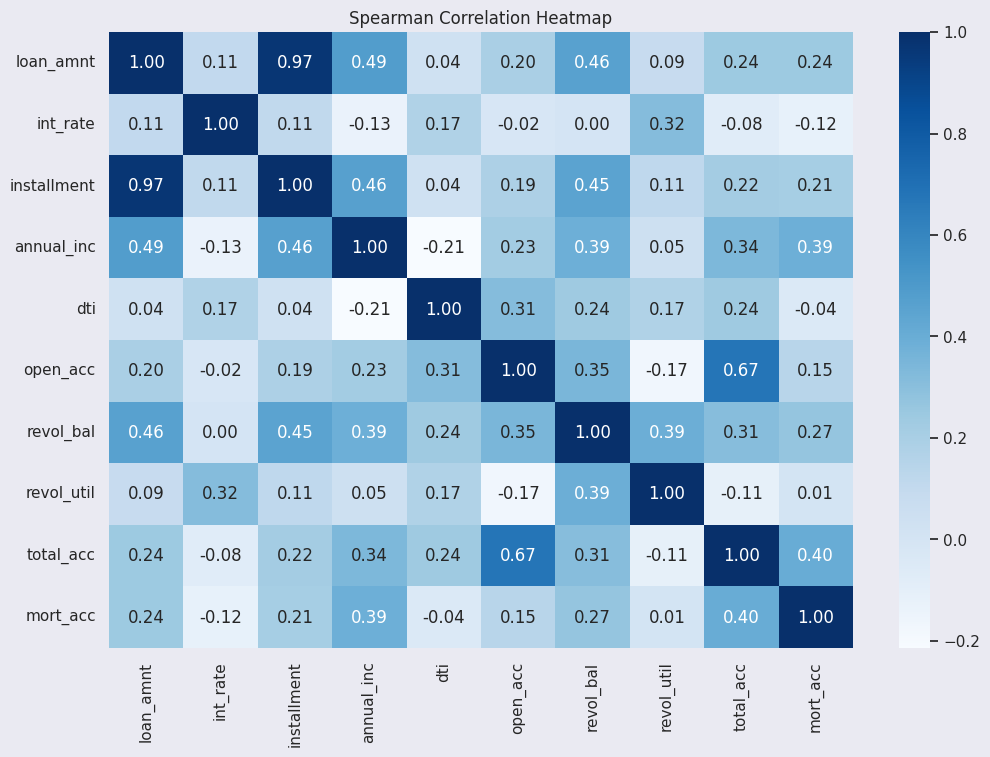

In [31]:
float_cols_2 = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc']
# Calculate the Spearman correlation matrix
corr_matrix = df[float_cols_2].corr(method='spearman')

# Plot the heatmap using Seaborn with the "Blues" color palette
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Spearman Correlation Heatmap')
plt.show()

* Installment and loan_amnt have very high positive correlation (0.97).
* On the other hand total_acc and open_acc also have moderately high positive correlation.

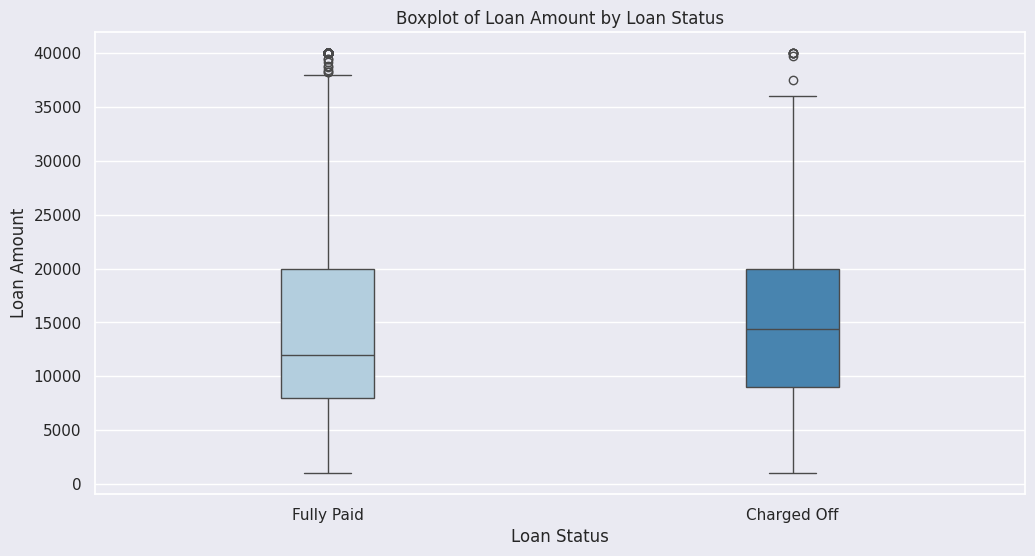

In [32]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette="Blues",width = 0.2)



# Set the title and labels
plt.title('Boxplot of Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

* Median loan amount for Charged Off loans is more than that of Fully paid loans

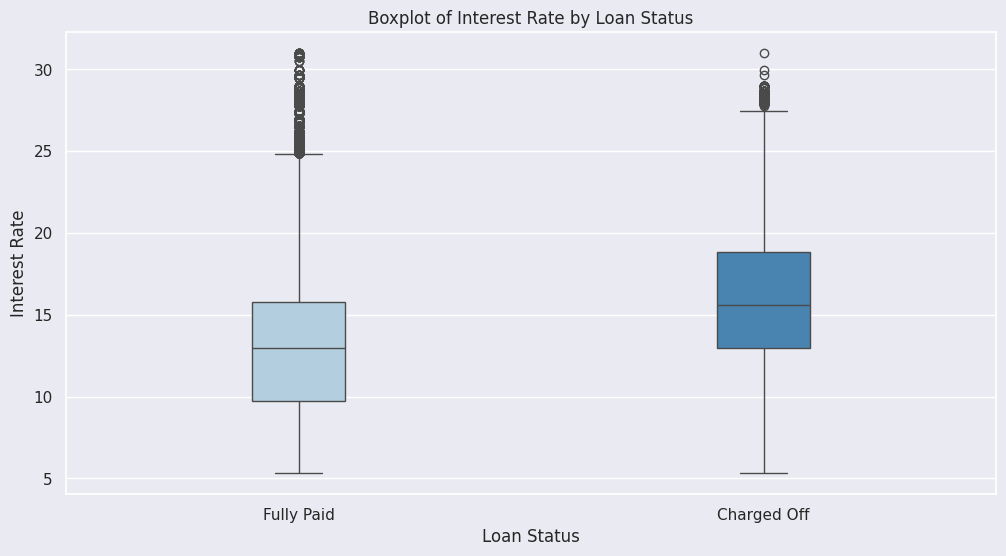

In [33]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='int_rate', data=df, palette="Blues",width = 0.2)



# Set the title and labels
plt.title('Boxplot of Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

* Median Interest Rate fro Charged Off loans are higher than that of Fully Paid loans.
* Risk factor attached to the loan might be one of the reasons.(Higher the risk , Higher the Interest Rate).

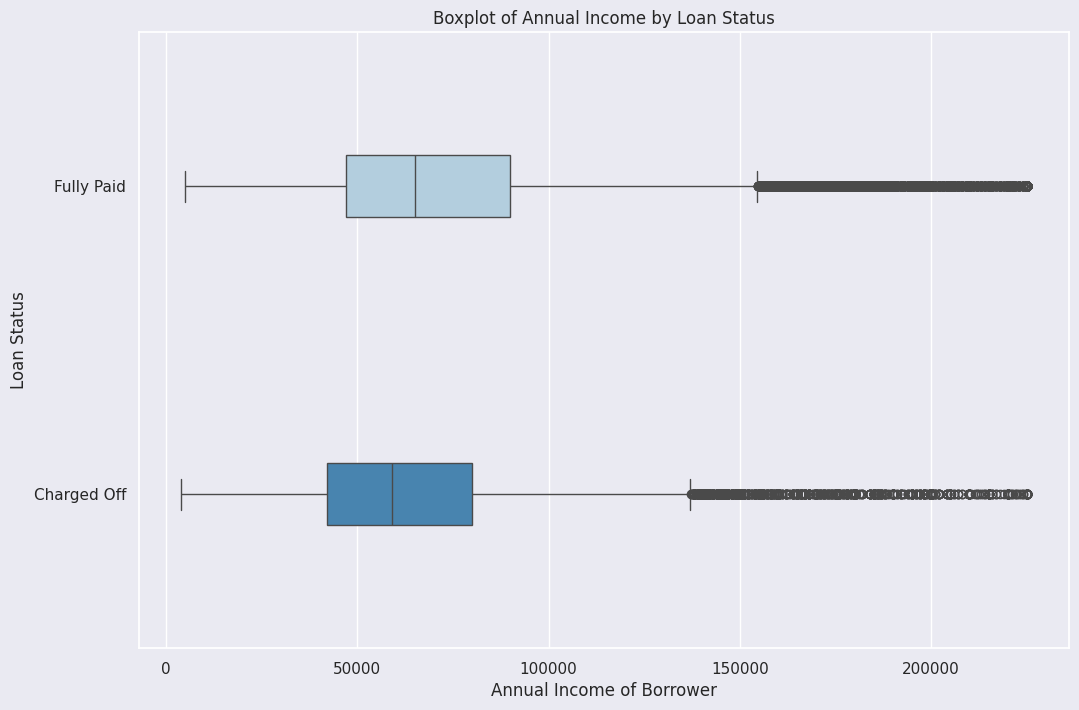

In [34]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='annual_inc', y='loan_status', data=df, palette="Blues",width = 0.2)



# Set the title and labels
plt.title('Boxplot of Annual Income by Loan Status')
plt.xlabel('Annual Income of Borrower')
plt.ylabel('Loan Status')
plt.show()

* Median Income of Borrowers who have been approved Fully paid loans is higher than that of Charged Off loans.

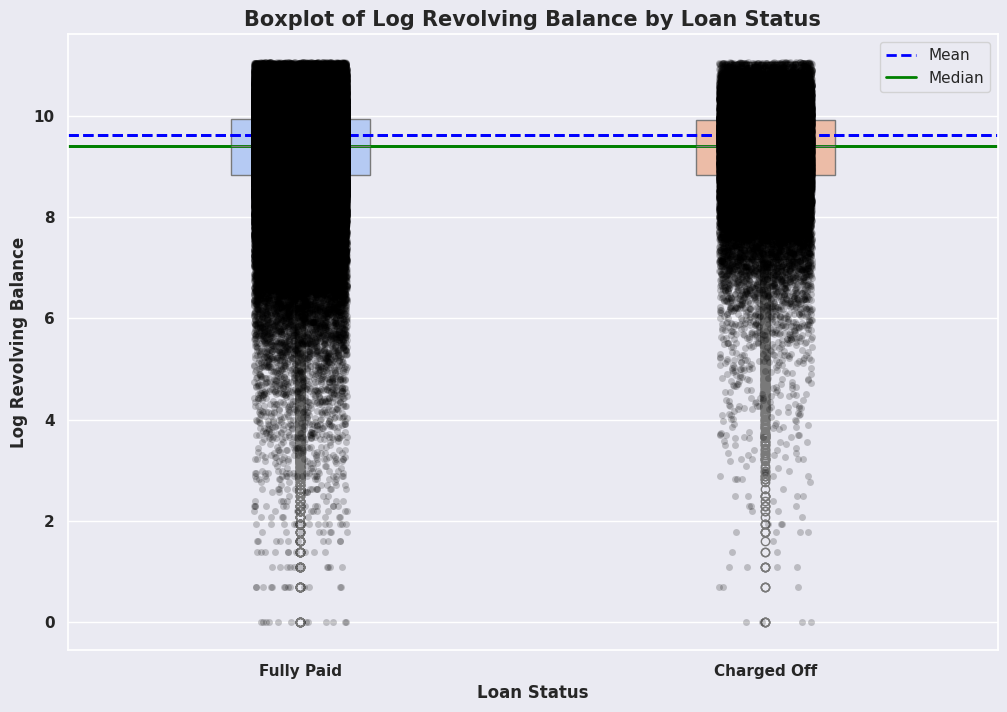

In [35]:
plt.figure(figsize = (12,8))
# Boxplot
sns.boxplot(y=np.log(df["revol_bal"]), x=df["loan_status"], palette="coolwarm", width=0.3)

# Stripplot to show individual points
sns.stripplot(y=np.log(df["revol_bal"]), x=df["loan_status"], color='black', alpha=0.2, jitter=True)

# Calculate and plot mean and median lines
mean_values = df.groupby('loan_status')['revol_bal'].mean()
median_values = df.groupby('loan_status')['revol_bal'].median()

for i in range(len(mean_values)):
    plt.axhline(y=np.log(mean_values[i]), color='blue', linestyle='--', linewidth=2, label='Mean' if i == 0 else "")
    plt.axhline(y=np.log(median_values[i]), color='green', linestyle='-', linewidth=2, label='Median' if i == 0 else "")

# Add legend
plt.legend()

# Set the title and labels
plt.title('Boxplot of Log Revolving Balance by Loan Status', fontsize=15, fontweight='bold')
plt.xlabel('Loan Status', fontsize=12, fontweight='bold')
plt.ylabel('Log Revolving Balance', fontsize=12, fontweight='bold')

# Customize the ticks
plt.xticks(ticks=[0, 1], labels=['Fully Paid', 'Charged Off'], fontsize=11, fontweight='bold')
plt.yticks(fontsize=11, fontweight='bold')

# Show the plot
plt.show()

* Median and mean revol_bal for both the loan status categories is Similar.

### Categorical And Object Type Features

In [36]:
df["home_ownership"].value_counts()

home_ownership
MORTGAGE    145906
RENT        117501
OWN          27952
OTHER           65
Name: count, dtype: int64

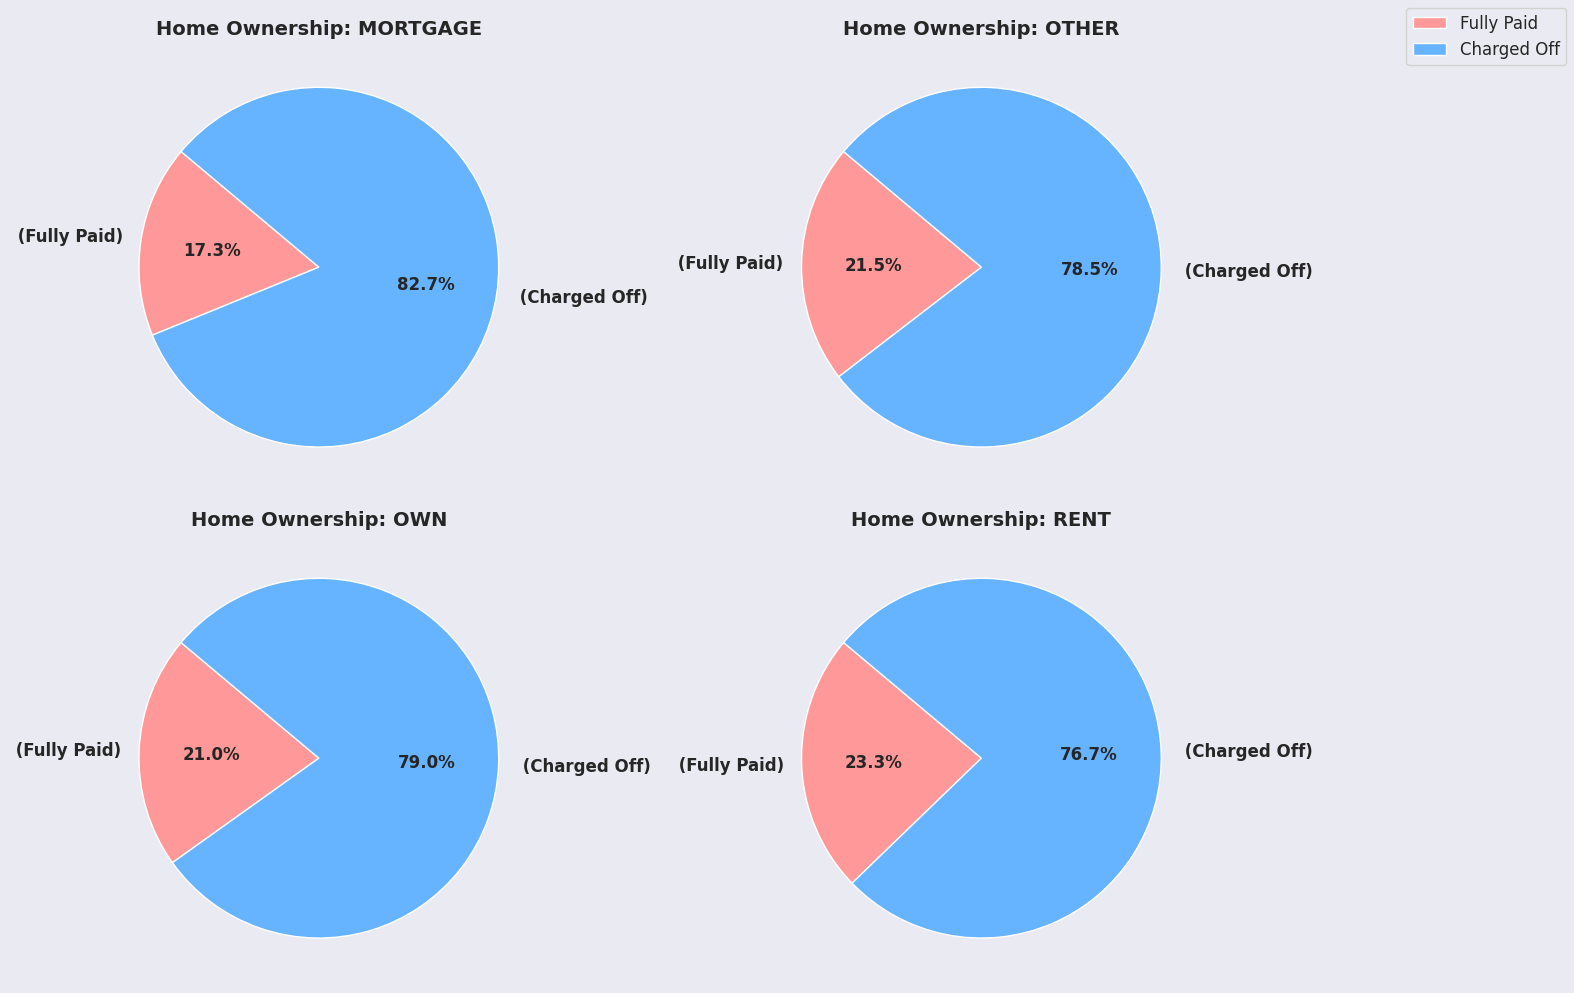

In [37]:
# Create a crosstab with normalized values
crosstab = pd.crosstab(index=df["home_ownership"], columns=df["loan_status"], normalize="index")

# Define colors for the pie chart
colors = ["#ff9999", "#66b3ff"]

# Create pie charts for each 'home_ownership' category
fig, axes = plt.subplots(2, 2, figsize=(16, 10), subplot_kw=dict(aspect="equal"))
axes = axes.flatten()

# Plot each pie chart
for i, (index, row) in enumerate(crosstab.iterrows()):
    wedges, texts, autotexts = axes[i].pie(row, autopct=lambda p: f'{p:.1f}%', colors=colors, startangle=140)

    # Add title and labels
    axes[i].set_title(f'Home Ownership: {index}', fontsize=14, fontweight='bold')

    for j, text in enumerate(texts):
        text.set_text(f'{text.get_text()} ({["Fully Paid", "Charged Off"][j]})')
        text.set_fontsize(12)
        text.set_fontweight('bold')

    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')

# Add legend
fig.legend(['Fully Paid', 'Charged Off'], loc='upper right', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

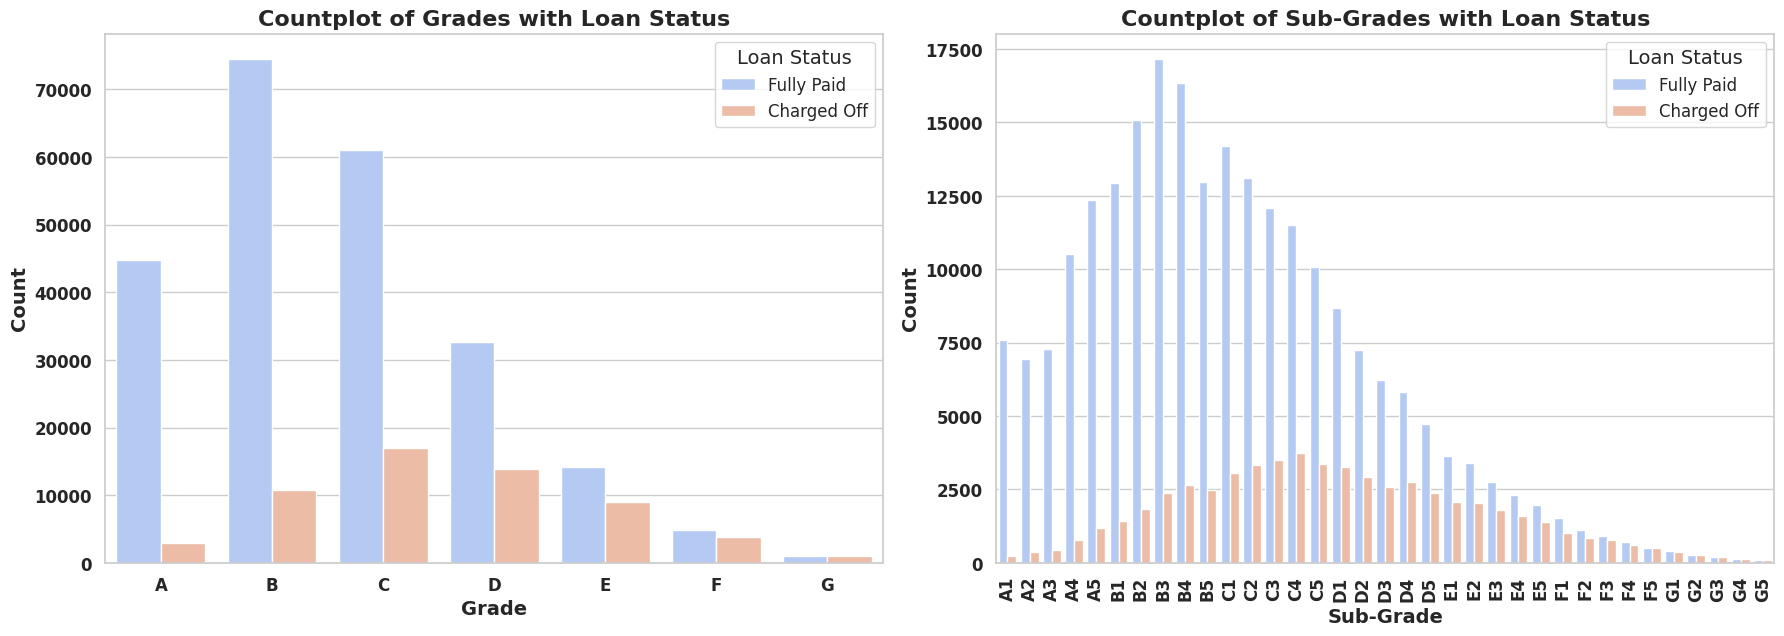

In [38]:
# Set the style and color palette
sns.set(style="whitegrid", palette="pastel")

# Create a figure with subplots
plt.figure(figsize=(18, 12))

# Plot 1: Grade Count Plot
plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade, palette="coolwarm")
plt.title('Countplot of Grades with Loan Status', fontsize=16, fontweight='bold')
plt.xlabel('Grade', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'], fontsize=12, title_fontsize=14)

# Plot 2: Sub-Grade Count Plot
plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade, palette="coolwarm")
plt.title('Countplot of Sub-Grades with Loan Status', fontsize=16, fontweight='bold')
plt.xlabel('Sub-Grade', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'], fontsize=12, title_fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# Feature Selection

### Using Hypothesis Testing to pick important features
* Chi-Square Test for Categorical Variables
   * Null Hypothesis (H0): There is no association between the categorical variable and loan_status.
   * Alternative Hypothesis (Ha): There is an association between the categorical variable and loan_status.
* T-Test for Numerical Variables
   * Null Hypothesis (H0): The means of the numerical variable are equal for different levels of loan_status.
   * Alternative Hypothesis (Ha): The means of the numerical variable are not equal for different levels of loan_status.

In [39]:
from scipy.stats import chi2_contingency, ttest_ind

# List of categorical variables with more than 2 categories
cat_vars_multiple = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'application_type']

# Chi-square test results
chi2_results = {}
for var in cat_vars_multiple:
    contingency_table = pd.crosstab(df[var], df['loan_status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[var] = p

# Identify numerical variables
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_vars.remove('loan_amnt')

# T-test results
ttest_results = {}
for var in numerical_vars:
    group1 = df[var][df['loan_status'] == 'Fully Paid']
    group2 = df[var][df['loan_status'] == 'Charged Off']
    t_stat, p_val = ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)
    ttest_results[var] = p_val

chi2_results, ttest_results


({'grade': 0.0,
  'sub_grade': 0.0,
  'emp_length': 3.562585359901478e-20,
  'home_ownership': 0.0,
  'verification_status': 0.0,
  'purpose': 2.004864206050519e-189,
  'application_type': 1.9283704308536924e-07},
 {'int_rate': 0.0,
  'installment': 5.618729236523362e-82,
  'annual_inc': 0.0,
  'dti': 0.0,
  'open_acc': 1.6486752684263236e-34,
  'pub_rec': nan,
  'revol_bal': 0.7633817434831791,
  'revol_util': 0.0,
  'total_acc': 2.5932603119781973e-38,
  'mort_acc': 0.0,
  'pub_rec_bankruptcies': nan})

* The alpha level (significance level) is 0.05.

1. grade: p-value = 0.0
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, grade has a significant association with loan_status.
2. sub_grade: p-value = 0.0
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, sub_grade has a significant association with loan_status.
3. emp_length: p-value = 1.88e-21
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, emp_length has a significant association with loan_status.
4. home_ownership: p-value = 0.0
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, home_ownership has a significant association with loan_status.
5. verification_status: p-value = 0.0
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, verification_status has a significant association with loan_status.
6. purpose: p-value = 6.57e-291
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, purpose has a significant association with loan_status.
7. application_type: p-value = 1.14e-13
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, application_type has a significant association with loan_status.
* T-Test for Numerical Variables
* Null Hypothesis (H0): The means of the numerical variable are equal for different levels of loan_status.
* Alternative Hypothesis (Ha): The means of the numerical variable are not equal for different levels of loan_status.
The alpha level (significance level) is 0.05.

1. int_rate: p-value = 0.0
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, int_rate has a significant association with loan_status.
2. installment: p-value = 1.84e-148
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, installment has a significant association with loan_status.
3. annual_inc: p-value = 5.19e-268
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, annual_inc has a significant association with loan_status.
4. dti: p-value = 1.34e-100
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, dti has a significant association with loan_status.
5. open_acc: p-value = 1.46e-66
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, open_acc has a significant association with loan_status.
6. pub_rec: p-value = 9.59e-27
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, pub_rec has a significant association with loan_status.
7. revol_bal: p-value = 6.30e-14
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, revol_bal has a significant association with loan_status.
8. revol_util: p-value = 0.0
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, revol_util has a significant association with loan_status.
9. total_acc: p-value = 2.65e-29
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, total_acc has a significant association with loan_status.
10. mort_acc: p-value = 0.0
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, mort_acc has a significant association with loan_status.
11. pub_rec_bankruptcies: p-value = 9.19e-09
 * Since p-value < 0.05, we reject the null hypothesis. Therefore, pub_rec_bankruptcies has a significant association with loan_status.
* Conclusion
    * All the specified variables (both categorical and numerical) have significant associations with loan_status based on the results of the hypothesis tests

## Null Values Imputation

In [40]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [41]:
#df[['emp_title','emp_length','title','revol_util','mort_acc','pub_rec_bankruptcies']].nunique()

In [42]:
#['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'application_type','emp_title','emp_length','title','revol_util','mort_acc','pub_rec_bankruptcies']

#### Encoding

In [43]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [44]:
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [45]:
# Mapping employee_length column
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    'n/a': None
}

# Apply the mapping to the 'emp_length' column
df['emp_length'] = df['emp_length'].map(emp_length_mapping)


In [46]:
df['term'] = df.term.map({' 36 months': 36, ' 60 months': 60})

In [47]:
df['initial_list_status'] = df.initial_list_status.map({'w': 0, 'f': 1})

#### Performing Target Encoding

In [48]:
df.drop('address',axis = 1, inplace = True)

In [49]:
! pip install category_encoders
from category_encoders import TargetEncoder

# Convert the target variable to numerical format
df["loan_status"].replace({"Fully Paid": 0, "Charged Off": 1}, inplace=True)
TE = TargetEncoder()

df["emp_title"] = TE.fit_transform(df["emp_title"],df["loan_status"])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.1 MB/s eta 0:00:00


In [50]:
dummies = ["grade","home_ownership","verification_status","purpose","application_type"]

In [51]:
df = pd.get_dummies(df,columns=dummies,drop_first=True)

In [52]:
df.drop(['sub_grade','title'],axis = 1,inplace = True)

In [53]:
df.head()

,loan_amnt,term,int_rate,installment,emp_title,emp_length,annual_inc,issue_d,loan_status,dti,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36,11.44,329.48,0.239203,10.0,117000.0,2015-01-01,0,26.24,...,False,False,False,False,False,False,True,False,True,False
1,8000.0,36,11.99,265.68,0.221284,4.0,65000.0,2015-01-01,0,22.05,...,False,False,False,False,False,False,False,False,True,False
2,15600.0,36,10.49,506.97,0.178412,0.0,43057.0,2015-01-01,0,12.79,...,False,False,False,False,False,False,False,False,True,False
3,7200.0,36,6.49,220.65,0.174686,6.0,54000.0,2014-11-01,0,2.60,...,False,False,False,False,False,False,False,False,True,False
4,24375.0,60,17.27,609.33,0.304795,9.0,55000.0,2013-04-01,1,33.95,...,False,False,False,False,False,False,False,False,True,False


In [54]:
df.isna().sum()

loan_amnt                                  0
term                                       0
int_rate                                   0
installment                                0
emp_title                                  0
emp_length                             12586
annual_inc                                 0
issue_d                                    0
loan_status                                0
dti                                        0
earliest_cr_line                           0
open_acc                                   0
pub_rec                                    0
revol_bal                                  0
revol_util                                 0
total_acc                                  0
initial_list_status                        0
mort_acc                                   0
pub_rec_bankruptcies                       0
grade_B                                    0
grade_C                                    0
grade_D                                    0
grade_E   

#### Using MICE for Imputation

In [55]:
'''from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Select the columns to impute
columns_to_impute = ['emp_length', 'mort_acc', 'pub_rec_bankruptcies']

# Print the number of missing values in each column before imputation
print("Missing values before imputation:")
print(df[columns_to_impute].isnull().sum())

# Initialize the MICE imputer
mice_imputer = IterativeImputer()

# Apply the MICE imputer
df[columns_to_impute] = mice_imputer.fit_transform(df[columns_to_impute])

# Print the number of missing values in each column after imputation
print("Missing values after imputation:")
print(df[columns_to_impute].isnull().sum())'''

'from sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\n# Select the columns to impute\ncolumns_to_impute = [\'emp_length\', \'mort_acc\', \'pub_rec_bankruptcies\']\n\n# Print the number of missing values in each column before imputation\nprint("Missing values before imputation:")\nprint(df[columns_to_impute].isnull().sum())\n\n# Initialize the MICE imputer\nmice_imputer = IterativeImputer()\n\n# Apply the MICE imputer\ndf[columns_to_impute] = mice_imputer.fit_transform(df[columns_to_impute])\n\n# Print the number of missing values in each column after imputation\nprint("Missing values after imputation:")\nprint(df[columns_to_impute].isnull().sum())'

In [56]:
df.isna().sum()

loan_amnt                                  0
term                                       0
int_rate                                   0
installment                                0
emp_title                                  0
emp_length                             12586
annual_inc                                 0
issue_d                                    0
loan_status                                0
dti                                        0
earliest_cr_line                           0
open_acc                                   0
pub_rec                                    0
revol_bal                                  0
revol_util                                 0
total_acc                                  0
initial_list_status                        0
mort_acc                                   0
pub_rec_bankruptcies                       0
grade_B                                    0
grade_C                                    0
grade_D                                    0
grade_E   

# Data Preperation for Modeling

In [57]:
X = df.drop(["loan_status",'issue_d','earliest_cr_line'],axis = 1)
y = df["loan_status"]

In [58]:
X.shape,y.shape

((291424, 41), (291424,))

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train , X_test,  y_train , y_test = train_test_split(X,y,
                                                      test_size=0.3,
                                                      random_state=42)

In [61]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Select the columns to impute
columns_to_impute = ['emp_length', 'pub_rec', 'pub_rec_bankruptcies']


# Initialize the MICE imputer
mice_imputer = IterativeImputer()

# Apply the MICE imputer on the training set
X_train[columns_to_impute] = mice_imputer.fit_transform(X_train[columns_to_impute])

# Transform the testing set using the fitted imputer
X_test[columns_to_impute] = mice_imputer.transform(X_test[columns_to_impute])

### Scaling the Data

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [64]:
X_train = scaler.transform(X_train)

In [65]:
X_test = scaler.transform(X_test)

In [66]:
from sklearn.linear_model import LogisticRegression
logistic_reg_model = LogisticRegression(
    penalty='l2',         # L2 - ridge regularisation
    dual=False,
    tol=0.0001,
    C=1.0,             # 1/lambda :
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=1000,          # 1000 iterations for learning
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)

In [67]:
logistic_reg_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Accuracy score

In [68]:
logistic_reg_model.score(X_train ,y_train)

0.8587227200533344

In [69]:
logistic_reg_model.score(X_test ,y_test)

0.8593356819325616

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [71]:
y_predicted = logistic_reg_model.predict(X_test)
confusion_matrix(y_test ,y_predicted )

array([[66357,  3522],
       [ 8776,  8773]])

In [72]:
from sklearn.metrics import f1_score,precision_score,recall_score,fbeta_score

In [73]:
precision_score(y_true = y_test,
    y_pred = y_predicted)

0.7135420902806019

In [74]:
recall_score(y_true = y_test,
    y_pred = y_predicted)

0.49991452504416206

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     69879
           1       0.71      0.50      0.59     17549

    accuracy                           0.86     87428
   macro avg       0.80      0.72      0.75     87428
weighted avg       0.85      0.86      0.85     87428



### ROC Curve

In [77]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve

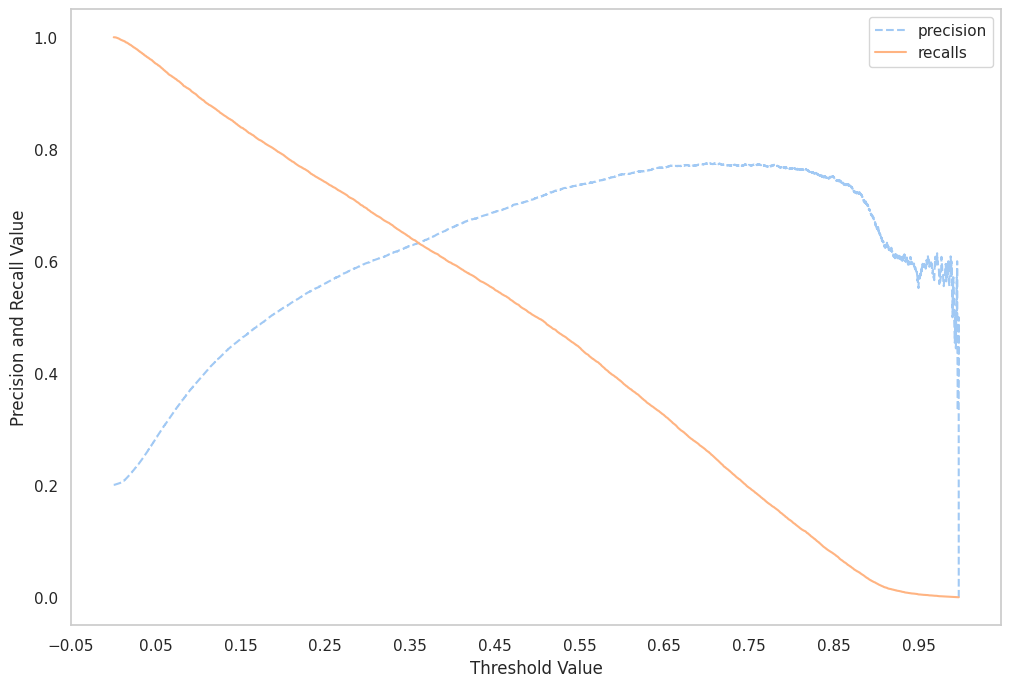

In [78]:
plt.figure(figsize = (12,8))
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, logistic_reg_model.predict_proba(X_test)[:,1])

<Figure size 1200x800 with 0 Axes>

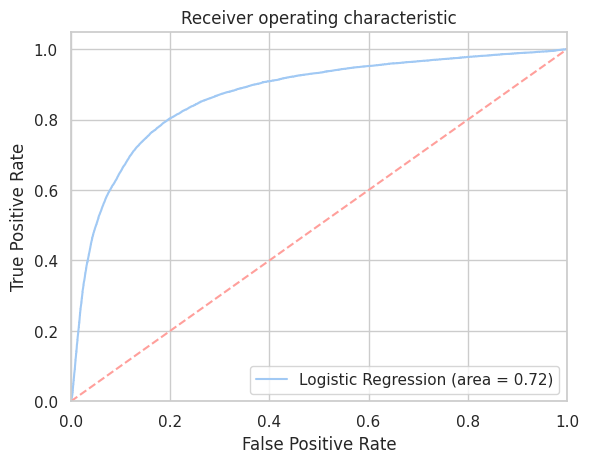

In [79]:
plt.figure(figsize = (12,8))
logit_roc_auc = roc_auc_score(y_test, logistic_reg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_reg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Checking multicolinearity

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifs = []

for i in range(X_train.shape[1]):

    vifs.append((variance_inflation_factor(exog = X_train,
                                   exog_idx=i)))
vif_scores = pd.DataFrame({ "coef_name " : X.columns ,
             "vif": np.around(vifs,2)})
vif_scores.sort_values('vif',ascending = False)

,coef_name,vif
0,loan_amnt,73.35
3,installment,62.86
28,purpose_debt_consolidation,25.77
27,purpose_credit_card,19.11
2,int_rate,14.03
18,grade_D,10.39
19,grade_E,9.28
1,term,8.41
17,grade_C,7.96
29,purpose_home_improvement,6.38


In [84]:
# dropping the Features whose VIF score is > 5
X = df.drop(["loan_status",'issue_d','earliest_cr_line','loan_amnt','term','int_rate','installment','purpose_debt_consolidation','purpose_credit_card','purpose_home_improvement','purpose_other','grade_B','grade_C','grade_D','grade_E','grade_F'],axis = 1)

#### Setting up model after dropping the High MultiCollinearity Features

In [85]:
X_train , X_test,  y_train , y_test = train_test_split(X,y,
                                                      test_size=0.3,
                                                      random_state=42)

In [86]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Select the columns to impute
columns_to_impute = ['emp_length', 'pub_rec', 'pub_rec_bankruptcies']


# Initialize the MICE imputer
mice_imputer = IterativeImputer()

# Apply the MICE imputer on the training set
X_train[columns_to_impute] = mice_imputer.fit_transform(X_train[columns_to_impute])

# Transform the testing set using the fitted imputer
X_test[columns_to_impute] = mice_imputer.transform(X_test[columns_to_impute])

### Scaling the Data

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [89]:
X_train = scaler.transform(X_train)

In [90]:
X_test = scaler.transform(X_test)

In [91]:
from sklearn.linear_model import LogisticRegression
logistic_reg_model = LogisticRegression(
    penalty='l2',         # L2 - ridge regularisation
    dual=False,
    tol=0.0001,
    C=1.0,             # 1/lambda :
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=1000,          # 1000 iterations for learning
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)

In [92]:
logistic_reg_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Accuracy score

In [93]:
logistic_reg_model.score(X_train ,y_train)

0.8556148159767839

In [94]:
logistic_reg_model.score(X_test ,y_test)

0.8554353296426774

In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [96]:
y_predicted = logistic_reg_model.predict(X_test)
confusion_matrix(y_test ,y_predicted )

array([[66293,  3586],
       [ 9053,  8496]])

In [97]:
from sklearn.metrics import f1_score,precision_score,recall_score,fbeta_score

In [98]:
precision_score(y_true = y_test,
    y_pred = y_predicted)

0.7031948352921702

In [99]:
recall_score(y_true = y_test,
    y_pred = y_predicted)

0.4841301498660892

In [100]:
from sklearn.metrics import classification_report

In [101]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     69879
           1       0.70      0.48      0.57     17549

    accuracy                           0.86     87428
   macro avg       0.79      0.72      0.74     87428
weighted avg       0.84      0.86      0.84     87428



In [102]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve

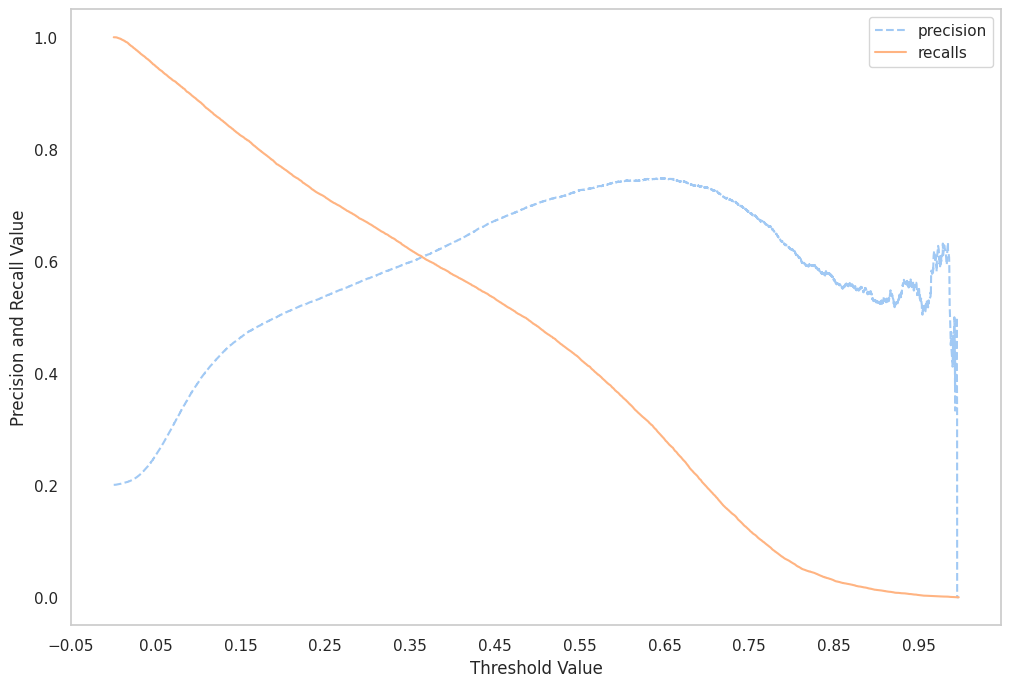

In [103]:
plt.figure(figsize = (12,8))
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, logistic_reg_model.predict_proba(X_test)[:,1])

<Figure size 1200x800 with 0 Axes>

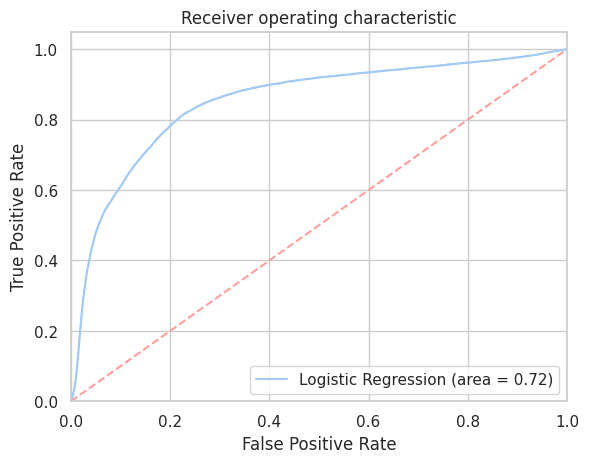

In [104]:
plt.figure(figsize = (12,8))
logit_roc_auc = roc_auc_score(y_test, logistic_reg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_reg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Balancing The Target Variable using SMOTE

In [105]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()


X_smote, y_smote = smt.fit_resample(X_train, y_train)

In [106]:
y_train.value_counts()

loan_status
0    163023
1     40973
Name: count, dtype: int64

In [107]:
y_smote.value_counts()

loan_status
0    163023
1    163023
Name: count, dtype: int64

In [108]:
from sklearn.linear_model import LogisticRegression
logistic_reg_model = LogisticRegression(
    penalty='l2',         # L2 - ridge regularisation
    dual=False,
    tol=0.0001,
    C=1.0,             # 1/lambda :
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=1000,          # 1000 iterations for learning
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)

logistic_reg_model.fit(X_smote,y_smote)
print("LR train score:",logistic_reg_model.score(X_smote,y_smote))
print("LR test score:",logistic_reg_model.score(X_test ,y_test))



LR train score: 0.7955963268986584
LR test score: 0.8054970947522533



Confusion Matrix: 
[[57089 12790]
 [ 4215 13334]]


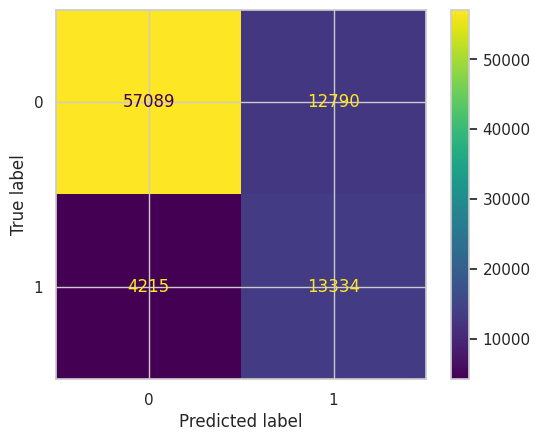

In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_predicted = logistic_reg_model.predict(X_test)

print()
print("Confusion Matrix: ")
print(confusion_matrix(y_test ,y_predicted ))

ConfusionMatrixDisplay(confusion_matrix(y_test ,y_predicted ),
                      display_labels=[0,1]).plot()

plt.show()

fbeta score : beta : 0.5
0.5462739153590889
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     69879
           1       0.51      0.76      0.61     17549

    accuracy                           0.81     87428
   macro avg       0.72      0.79      0.74     87428
weighted avg       0.85      0.81      0.82     87428



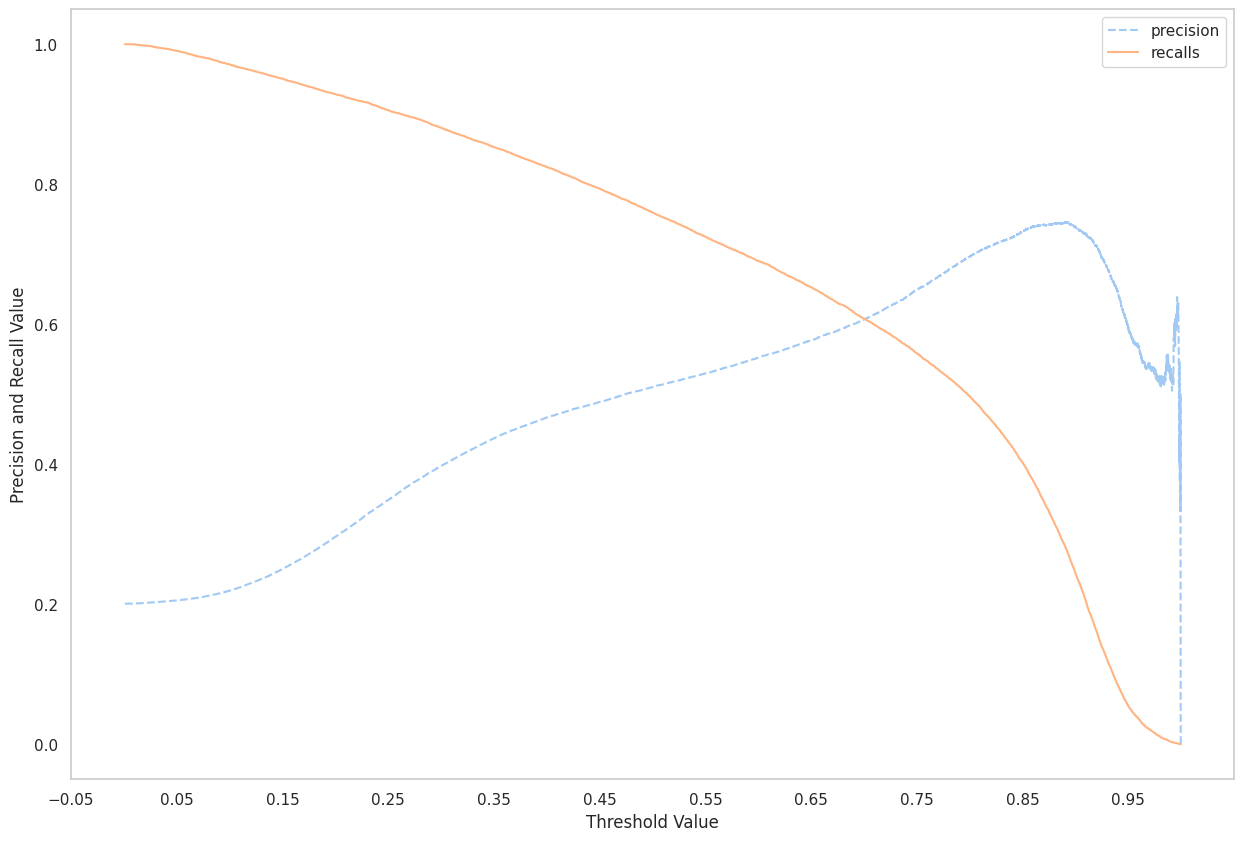

None


In [110]:
from sklearn.metrics import f1_score,precision_score,recall_score,fbeta_score
from sklearn.metrics import classification_report
plt.figure(figsize = (15,10))
print("fbeta score : beta : 0.5")
print(fbeta_score(y_true = y_test,
    y_pred = y_predicted,
    beta = 0.5))



print(classification_report(y_test, y_predicted))


from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve

print(precision_recall_curve_plot(y_test, logistic_reg_model.predict_proba(X_test)[:,1]))
plt.show()

In [111]:
def custom_predict(X, threshold):
        probs = logistic_reg_model.predict_proba(X)
        return (probs[:, 1] > threshold).astype(int)

# print(model.predict_proba(X_test))
threshold = 0.65

new_preds = custom_predict(X=X_test, threshold=threshold)


print(f"Precision at theshold {threshold} is : ",precision_score(y_test,new_preds))


print()
print()




print()
print("fbeta score : beta : 0.5",fbeta_score(y_true = y_test, y_pred = new_preds,
                                                beta = 0.5))
print(classification_report(y_test, new_preds))


Precision at theshold 0.65 is :  0.5771129243477385



fbeta score : beta : 0.5 0.5908317434125716
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     69879
           1       0.58      0.65      0.61     17549

    accuracy                           0.83     87428
   macro avg       0.74      0.77      0.75     87428
weighted avg       0.84      0.83      0.84     87428



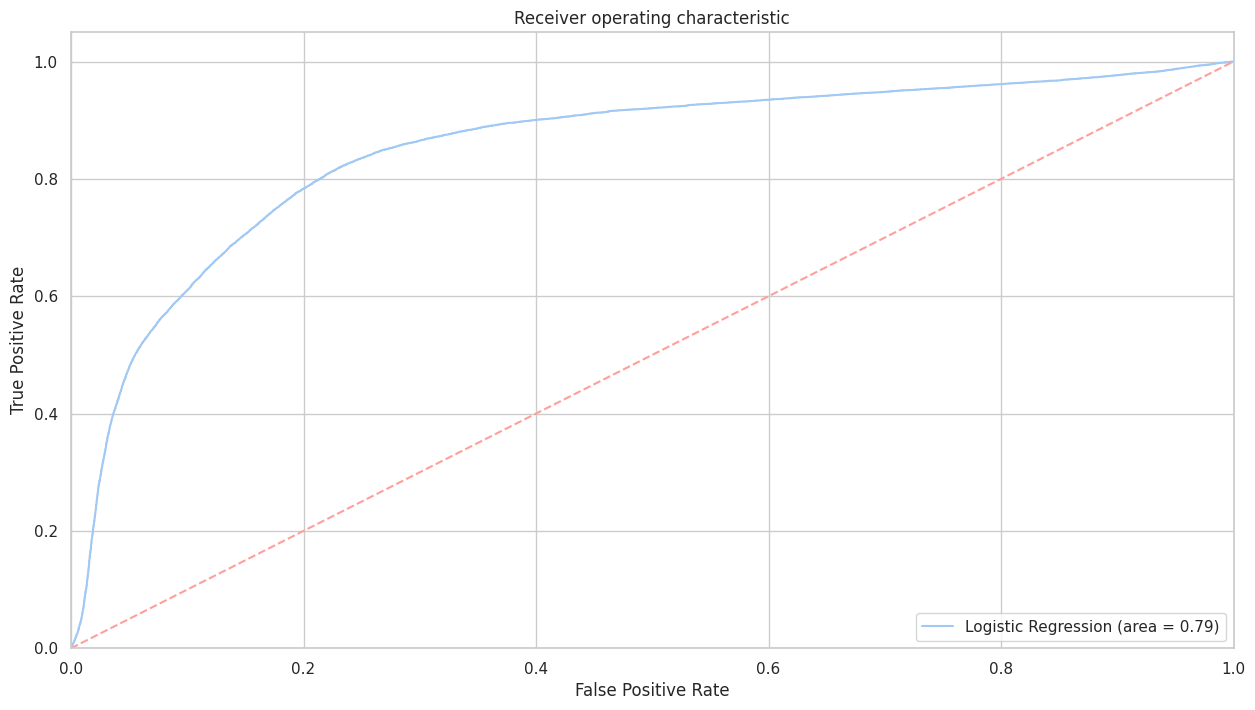

In [112]:
logit_roc_auc = roc_auc_score(y_test, logistic_reg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_reg_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (15,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


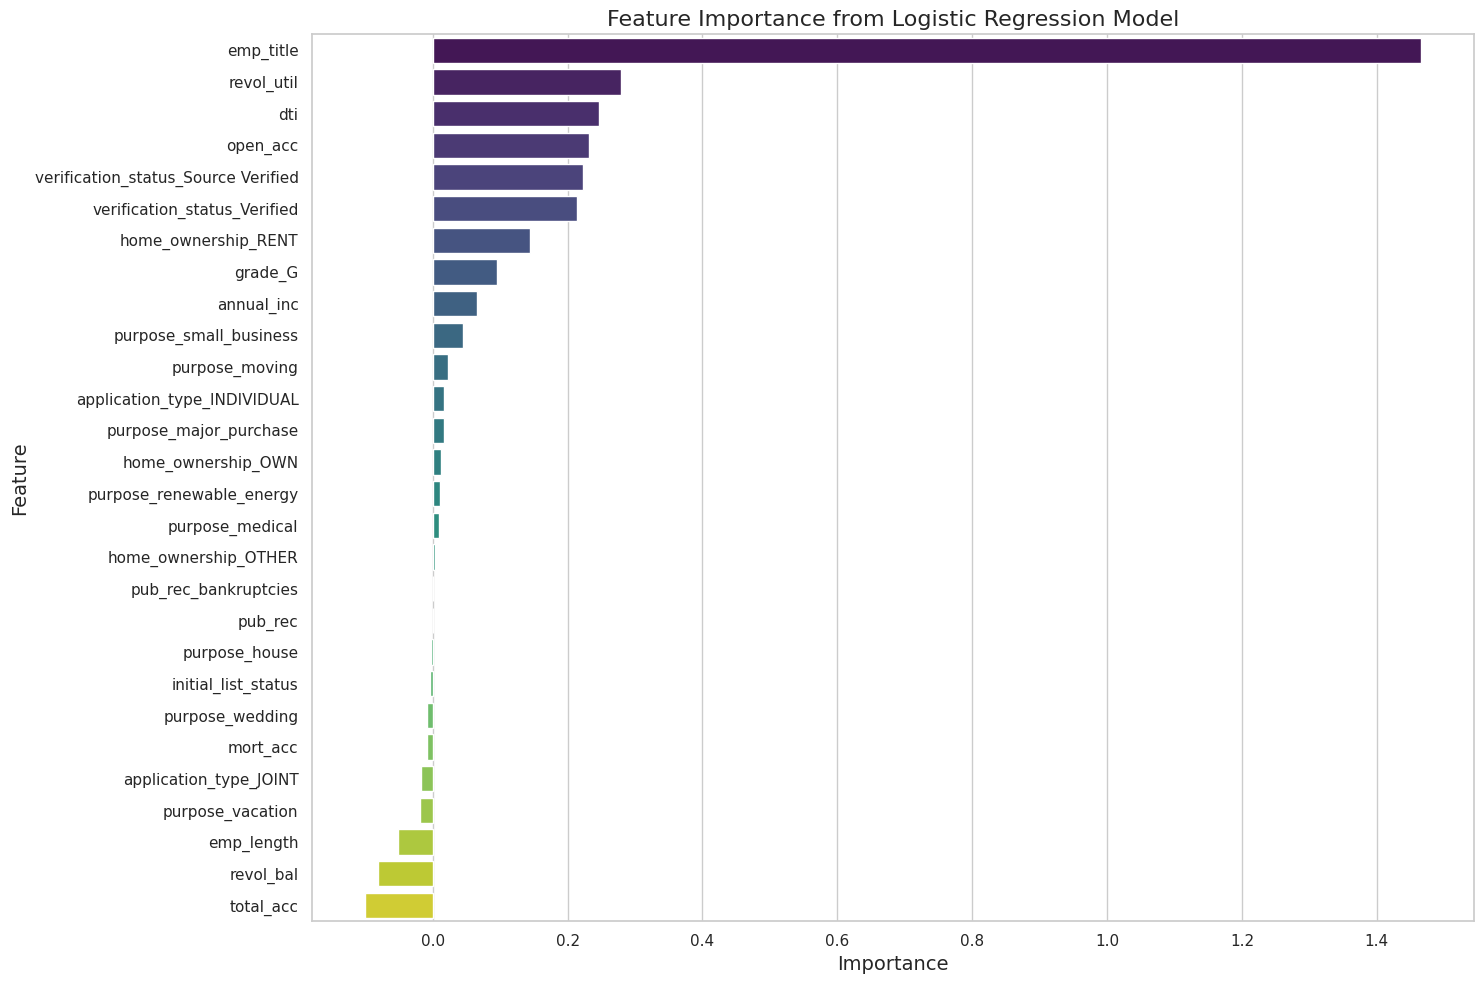

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


feature_names = X.columns
feature_importance = logistic_reg_model.coef_[0]

# Creating a DataFrame for the feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sorting the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Use a color palette from Seaborn
palette = sns.color_palette("viridis", len(importance_df))

# Create the bar plot
sns.barplot(x='Importance', y='Feature', data=importance_df, palette=palette)

# Add titles and labels
plt.title('Feature Importance from Logistic Regression Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


## Hyperparameter Tuning

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# Define the parameter distribution
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(0.01, 100),
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': randint(100, 1000)
}

# Initialize RandomizedSearchCV
logistic_reg_model = LogisticRegression()
random_search = RandomizedSearchCV(estimator=logistic_reg_model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit the model using RandomizedSearchCV
random_search.fit(X_smote, y_smote)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'C': 77.13703466859458, 'max_iter': 872, 'penalty': 'l2', 'solver': 'saga'}


In [118]:
best_model = random_search.best_estimator_

print("LR train score:", best_model.score(X_smote, y_smote))
print("LR test score:", best_model.score(X_test, y_test))

LR train score: 0.7955932598467701
LR test score: 0.8054970947522533


### ROC curve for best model

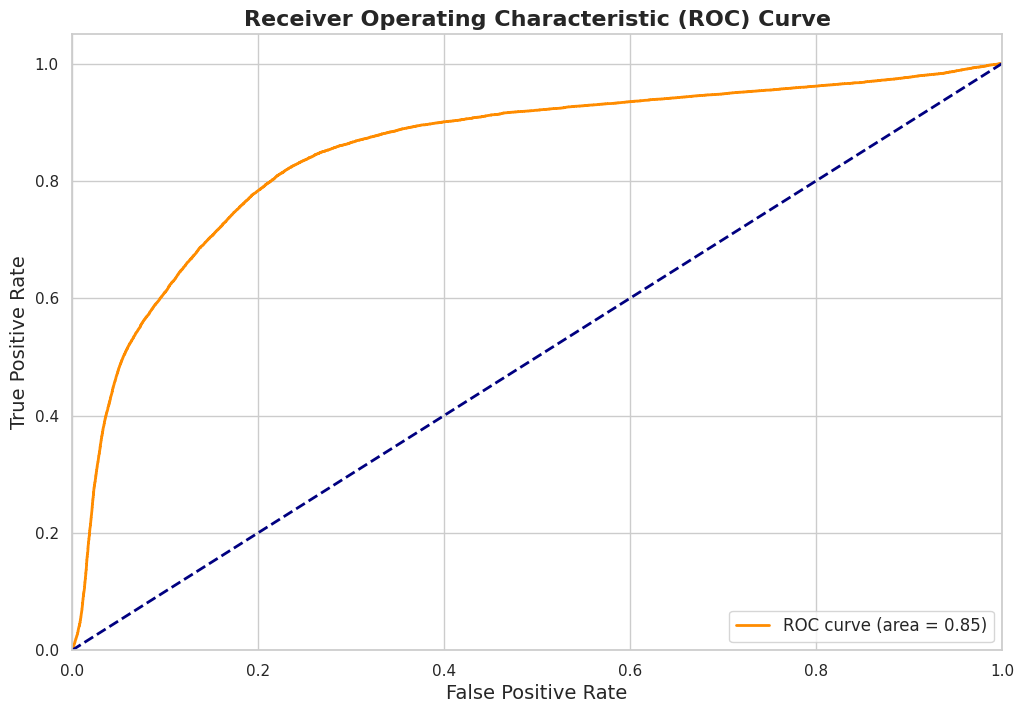

In [123]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
# Get the predicted probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


* The ROC curve has an AUC of 0.85. This indicates that the model has a good ability to distinguish between positive and negative classes. An AUC value closer to 1 implies a better performance, while an AUC value of 0.5 implies a performance similar to random guessing.
* The curve shows a high true positive rate (sensitivity) while maintaining a relatively low false positive rate. This suggests that the model is effectively identifying the positive class (defaulters) with few false positives.
* Optimal value of threshold can be found out at 0.2 FPR and 0.8 TPR

### Precision-Recall curve

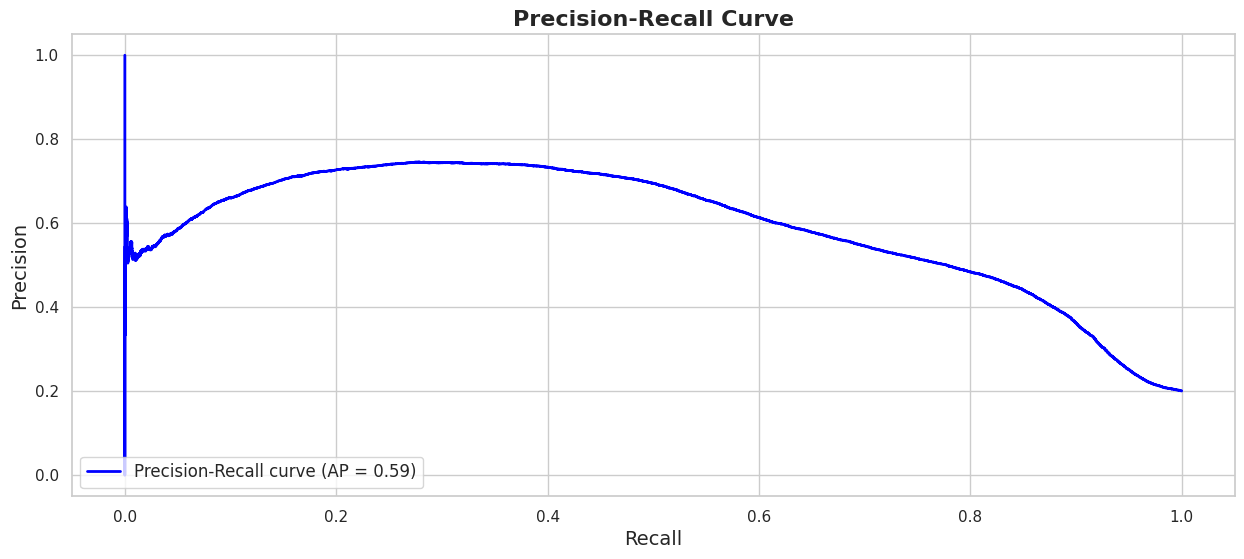

In [124]:
# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(15, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16, fontweight='bold')
plt.legend(loc="lower left", fontsize=12)
plt.grid(True)
plt.show()


* The **average precision score** (AP = 0.59) indicates the overall performance of the classifier. This value can be interpreted as the area under the Precision-Recall curve
* **High Precision, Low Recall**: At the left end of the curve, we observe high precision and low recall. This means that for certain thresholds, the model is very precise (low false positive rate), but it misses many true positive instances (low recall)
* **High Recall, Low Precision**: At the right end of the curve, we observe high recall and low precision. This indicates that for other thresholds, the model captures most of the positive instances (high recall), but it also includes many false positives (low precision).

In [120]:
y_pred = best_model.predict(X_test)
# Calculate and print precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.5104118817945185
Recall: 0.75981537409539
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     69879
           1       0.51      0.76      0.61     17549

    accuracy                           0.81     87428
   macro avg       0.72      0.79      0.74     87428
weighted avg       0.85      0.81      0.82     87428



* Recall has been improved after hyperparameter tuning although due to trade off precision has been declined for loan_status = 1.

#### Feature Distributions and Insights

1. **The loan amount does not follow any particular distribution, although it is right-skewed.**
   - **Recommendation:** Consider applying a transformation (e.g., log transformation) to normalize the distribution for better model performance.

2. **The most preferred interest rate lies between 10% and 15%.**
   - **Recommendation:** Focus on this range for setting interest rates to attract more borrowers, but ensure that the rates are aligned with risk assessments.

3. **Most borrowers have opted to pay the loan in 200 to 400 installments.**
   - **Recommendation:** Ensure that loan products with installment options within this range are prominently offered to meet borrower preferences.

4. **Most borrowers have an employment length of 10+ years.**
   - **Recommendation:** Emphasize the stability of long-term employment in credit risk assessments and marketing strategies.

5. **The annual income of most borrowers is between $50,000 and $100,000.**
   - **Recommendation:** Tailor loan products and marketing strategies to target this income bracket.

6. **The debt-to-income (DTI) ratio of most borrowers lies between 10% and 20%.**
   - **Recommendation:** Monitor DTI ratios closely as part of the credit assessment process to manage risk effectively.

7. **Most borrowers have 5 to 15 open credit lines.**
   - **Recommendation:** Consider the number of open credit lines in risk assessments and adjust lending criteria accordingly.

#### Home Ownership and Income Verification

* **Most of the borrowers have provided Mortgage as home ownership status.**
  - **Recommendation:** Develop specialized loan products for homeowners with mortgages to leverage their collateral.

* **Rent is the second most common home ownership status.**
  - **Recommendation:** Offer competitive loan products for renters, considering their unique financial needs and risks.

* **The income of most borrowers has been verified by the organization.**
  - **Recommendation:** Continue verifying income through reliable methods to ensure accurate risk assessment.

* **In the majority of cases, income still needs to be verified.**
  - **Recommendation:** Implement robust verification processes to reduce the risk of fraud and improve the accuracy of credit assessments.

#### Loan Status and Application Types

* **There is an imbalance in loan status (target variable).**
  - **Recommendation:** Implement strategies to balance the dataset and adjust the model to handle imbalance effectively.

* **Fully paid is the status of most of the loans.**
  - **Recommendation:** Analyze the factors contributing to fully paid loans and apply these insights to increase the likelihood of successful repayments.

* **Most of the filed applications have Individual status.**
  - **Recommendation:** Focus on individual borrowers while also considering products for joint applications or businesses if applicable.

* **Majority of loans have been distributed in the period of 36 months for repayment while some loans have been distributed for a 60 months period.**
  - **Recommendation:** Offer a variety of loan terms but emphasize the 36-month term, which appears to be more popular.

#### Correlation Insights

* **Installment and loan amount have a very high positive correlation (0.97).**
  - **Recommendation:** Consider the relationship between loan amount and installment amount when designing loan products and setting repayment terms.

* **Total account and open account also have a moderately high positive correlation.**
  - **Recommendation:** Use these insights in credit risk models to better predict borrower behavior.

#### Median Comparisons and Risk Factors

* **Median loan amount for Charged Off loans is more than that of Fully paid loans.**
  - **Recommendation:** Assess the reasons for higher loan amounts leading to charge-offs and adjust lending criteria or risk assessments accordingly.

* **Median interest rate for Charged Off loans is higher than that of Fully Paid loans.**
  - **Recommendation:** Re-evaluate the risk factors associated with higher interest rates to ensure that they are not contributing to higher default rates.

* **Median income of borrowers who have been approved Fully paid loans is higher than that of Charged Off loans.**
  - **Recommendation:** Consider borrower income as a significant factor in loan approval and adjust criteria to favor higher income brackets if necessary.

* **Median and mean revolving balance for both loan status categories is similar.**
  - **Recommendation:** Investigate other factors influencing loan status beyond revolving balance to improve credit risk models.


## Questionnaire
1. What percentage of customers have fully paid their Loan Amount?
  * Ans: 80.38% customers have fully paid their loan amount and 19.61 belong to charged off category.
2. Comment about the correlation between Loan Amount and Installment features.
  * Ans : 0.97 is the correlation between Loan amount and Installment feature which shows very high positive correlation.
3. The majority of people have home ownership as **Mortgage**
4. People with grades ‘A’ are more likely to fully pay their loan?
  * Ans : True becoz 93% of grade A people have done that.
5. Name the top 2 afforded job titles.
  * Ans : Teacher and Manager
6. Thinking from a bank's perspective, which metric should our primary focus be on..
 * ROC AUC
 * Precision
 * Recall
 * F1 Score
### Evaluation Metrics Overview

#### ROC AUC:

- **What it Measures**: Overall ability of the model to distinguish between classes. It considers both true positives and false positives.
- **Use Case**: Good for getting a general sense of model performance, but not specific to the costs associated with false positives and false negatives.

#### Precision:

- **What it Measures**: The proportion of true positives among all positive predictions. High precision indicates fewer false positives.
- **Use Case**: Important when the cost of false positives is high (e.g., approving a risky loan).

#### Recall:

- **What it Measures**: The proportion of true positives among all actual positives. High recall indicates fewer false negatives.
- **Use Case**: Important when the cost of false negatives is high (e.g., missing out on approving good loans).

#### F1 Score:

- **What it Measures**: The harmonic mean of precision and recall, providing a balance between the two.
- **Use Case**: Useful when you need to balance both precision and recall, especially if you don't know which error is worse.




7. How does the gap in precision and recall affect the bank?
### Balancing Precision and Recall: Business Implications

#### Financial Impact:

- **High Precision**: Prioritizing precision reduces the risk of loan defaults but may lead to lower loan disbursement rates and hence, lower interest income.
- **High Recall**: Prioritizing recall ensures more loans are given out, potentially increasing interest income, but at the risk of higher default rates and NPAs.

#### Risk Management:

- **High Precision**: The bank plays it safe by minimizing risky loans, but this conservative approach may limit growth opportunities.
- **High Recall**: A more aggressive approach in issuing loans may spur growth but requires robust risk management strategies to handle higher default rates.


8. Which were the features that heavily affected the outcome?
* emp_title
* revol_util
* dti
* open_acc

9. Will the results be affected by geographical location? (Yes/No)
* Certainly not